*******************************************************************************************************
*******************************************************************************************************
# PROJECT (code)

**A comparison and application of machine learning techniques towards the analysis of UCI's heart failure dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df4 = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Data Preprocessing

In [3]:
df4.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Checking for Missing Values MV: 
df4.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Checking for duplicated rows
duplicates = df4[df4.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (0, 13)


In [7]:
df4.shape

(299, 13)

# Exploratory Data Analysis (EDA)

In [8]:
# Converting categorical attributes to text for better data exploratory and visualization

df4['anaemia'][df4['anaemia'] == 0] = 'No anaemia'
df4['anaemia'][df4['anaemia'] == 1] = 'Has anaemia'

df4['diabetes'][df4['diabetes'] == 0] = 'No diabetes'
df4['diabetes'][df4['diabetes'] == 1] = 'Has diabetes'

df4['high_blood_pressure'][df4['high_blood_pressure'] == 0] = 'High_BP'
df4['high_blood_pressure'][df4['high_blood_pressure'] == 1] = 'Normal_BP'

df4['sex'][df4['sex'] == 0] = 'Female'
df4['sex'][df4['sex'] == 1] = 'Male'

df4['smoking'][df4['smoking'] == 0] = 'No'
df4['smoking'][df4['smoking'] == 1] = 'Yes'

df4['DEATH_EVENT'][df4['DEATH_EVENT'] == 1] = 'Dead'
df4['DEATH_EVENT'][df4['DEATH_EVENT'] == 0] = 'Alive'


In [9]:
df4['anaemia'].value_counts()

No anaemia     170
Has anaemia    129
Name: anaemia, dtype: int64

In [10]:
df4['diabetes'].value_counts()

No diabetes     174
Has diabetes    125
Name: diabetes, dtype: int64

In [11]:
df4['high_blood_pressure'].value_counts()

High_BP      194
Normal_BP    105
Name: high_blood_pressure, dtype: int64

In [12]:
df4['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [13]:
df4['smoking'].value_counts()

No     203
Yes     96
Name: smoking, dtype: int64

In [14]:
df4['DEATH_EVENT'].value_counts()

Alive    203
Dead      96
Name: DEATH_EVENT, dtype: int64

In [15]:
# Data.head visualization of modification to categorical attributes
df4.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No anaemia,582,No diabetes,20,Normal_BP,265000.00,1.9,130,Male,No,4,Dead
1,55.0,No anaemia,7861,No diabetes,38,High_BP,263358.03,1.1,136,Male,No,6,Dead
2,65.0,No anaemia,146,No diabetes,20,High_BP,162000.00,1.3,129,Male,Yes,7,Dead
3,50.0,Has anaemia,111,No diabetes,20,High_BP,210000.00,1.9,137,Male,No,7,Dead
4,65.0,Has anaemia,160,Has diabetes,20,High_BP,327000.00,2.7,116,Female,No,8,Dead


In [16]:
df4.shape

(299, 13)

**Distribution of Heart Disease ('Goal' Attribute)**

In [17]:
df4.groupby('DEATH_EVENT').size()


DEATH_EVENT
Alive    203
Dead      96
dtype: int64

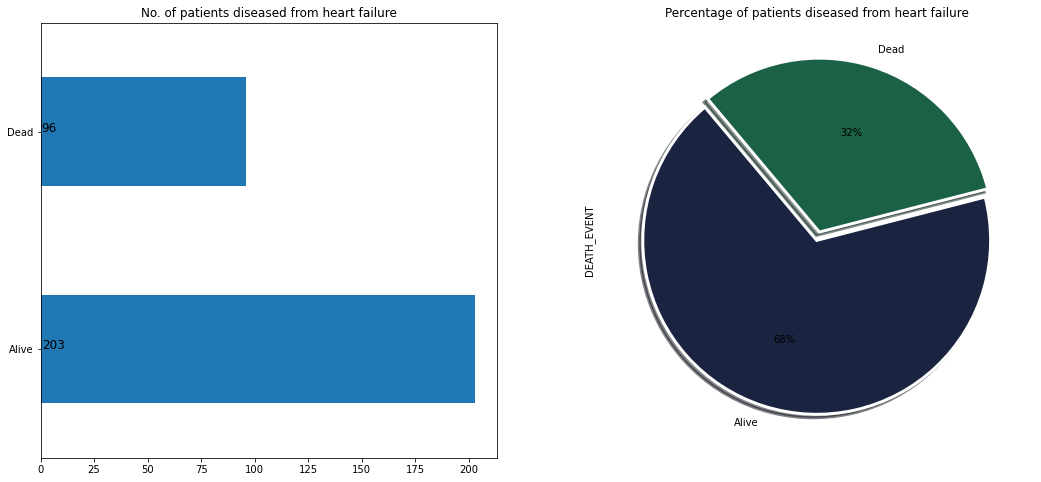

In [18]:
# plotting the distribution of 'DEATH_EVENT' attribute along those diseased or not from heart diseases
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = df4["DEATH_EVENT"].value_counts().plot(kind="barh", ax =ax1)
for i,j in enumerate(df4["DEATH_EVENT"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'No. of patients diseased from heart failure')


ax2 = df4['DEATH_EVENT'].value_counts().plot.pie(colors = sns.color_palette("cubehelix"), 
                   autopct = "%1.0f%%", startangle = 130, wedgeprops={"linewidth":3,"edgecolor":"w"},
                                               explode=[.0,.1/2], shadow=True);
ax2.set(title = 'Percentage of patients diseased from heart failure')

plt.show()

# Analysis of Numerical Attributes

In [19]:
#A discription of numberical attributes
df4.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


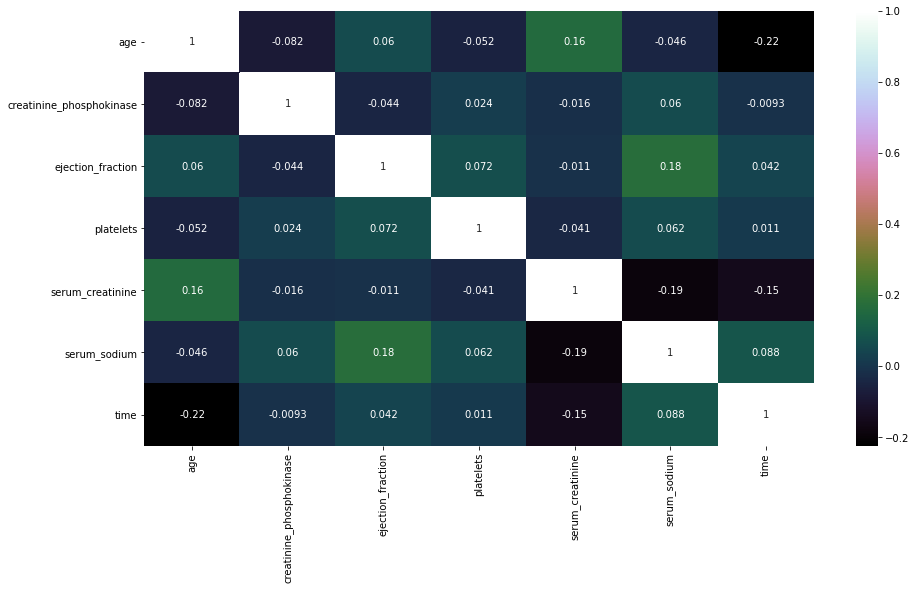

In [20]:
# A correletional heatmap of numberical attributes

plt.figure(figsize=(15,8))
sns.heatmap(df4.corr(), annot=True, cmap='cubehelix', )
plt.show()

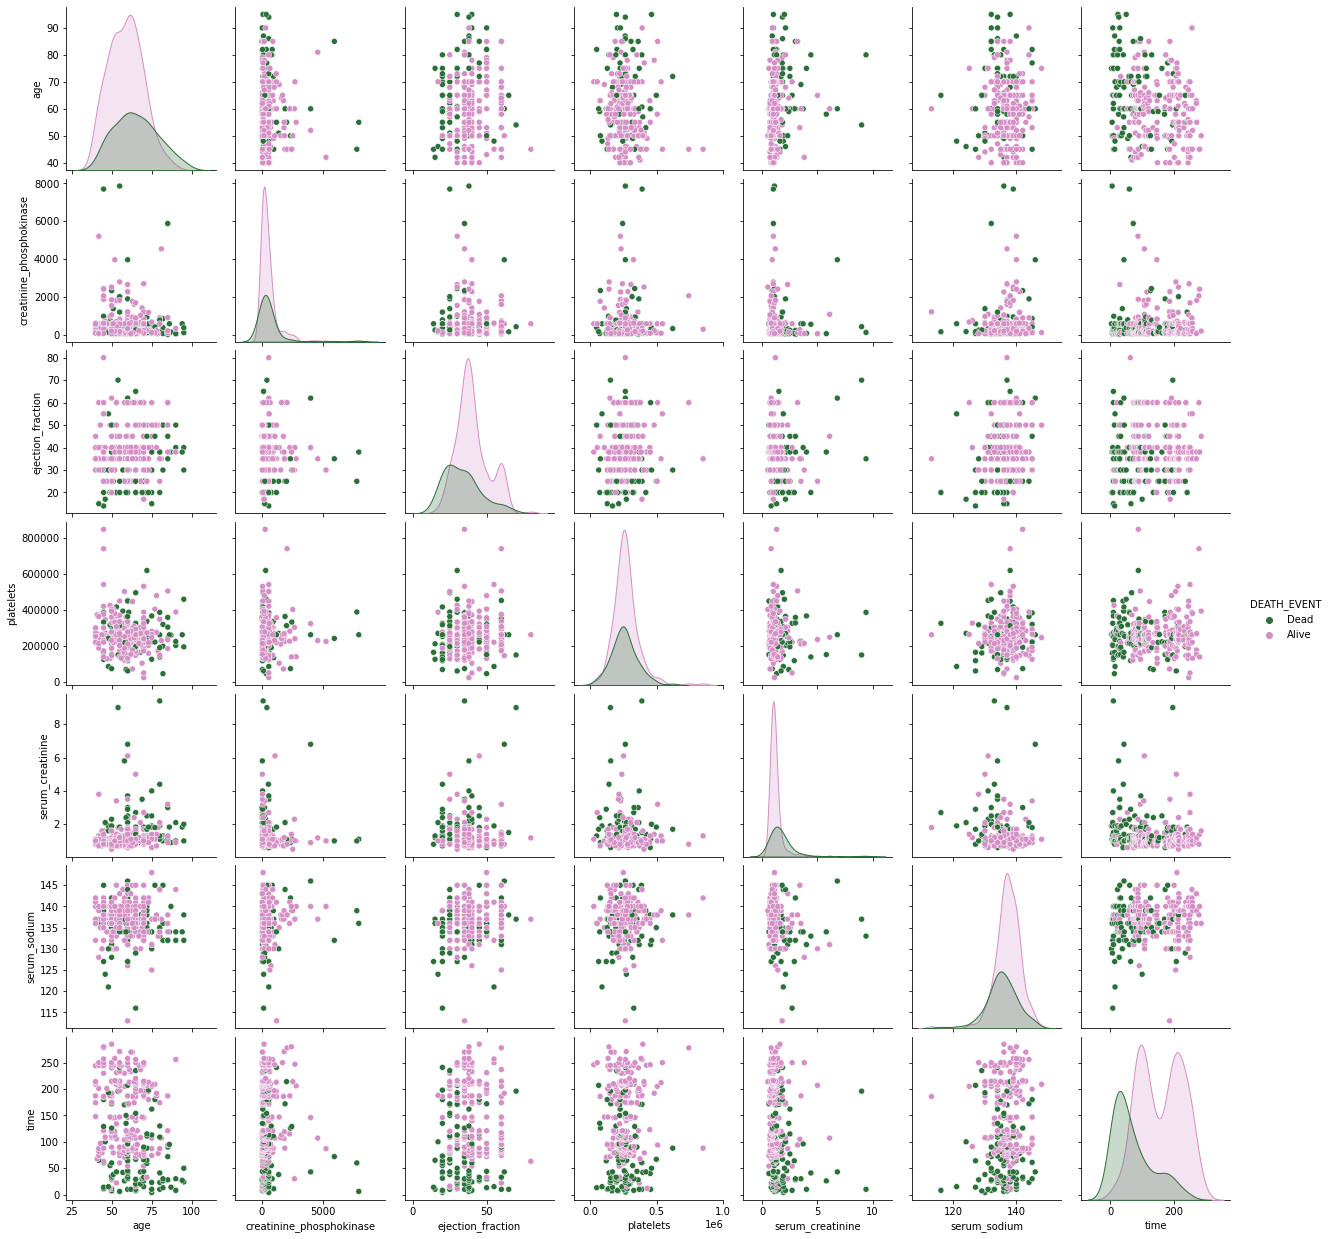

In [21]:
sns.pairplot(df4, hue = 'DEATH_EVENT', palette='cubehelix', vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                                                                 'serum_creatinine', 'serum_sodium', 'time'])
plt.show()

In [22]:
# Grouping patients along dead or living from heart diseases into two dinstinct dataframe for use in visualization below
DEATH_EVENT1=df4[df4['DEATH_EVENT']=='Dead']
DEATH_EVENT0=df4[df4['DEATH_EVENT']=='Alive']

**Review of age Distribution**

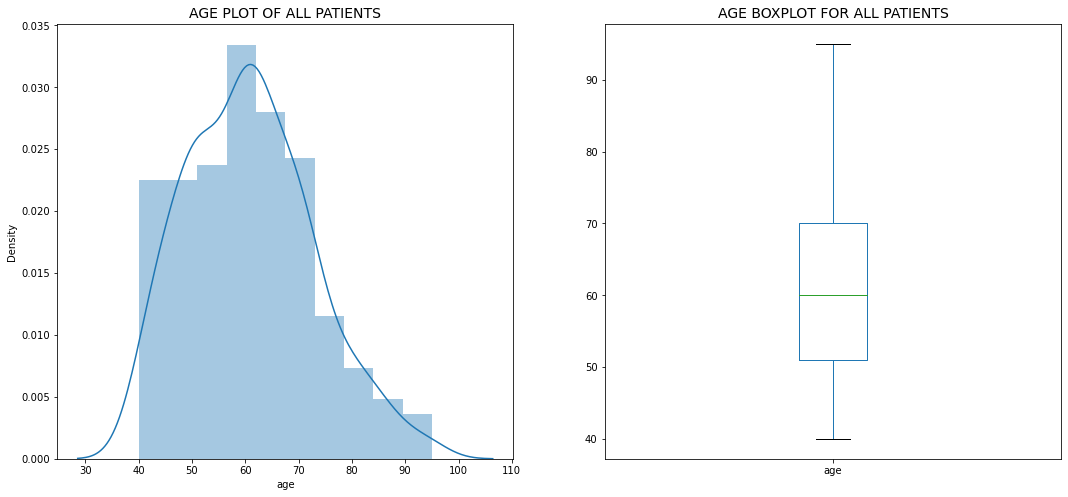

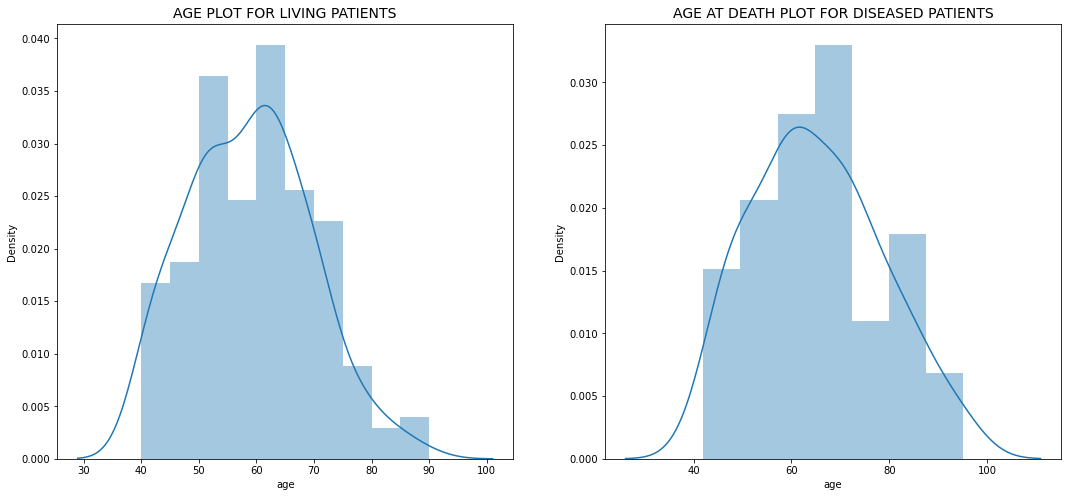

In [23]:
# plotting 'Age' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['age'])
plt.title('AGE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['age'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('AGE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Age' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['age'])
plt.title('AGE PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'Age' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['age'])
plt.title('AGE AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of creatinine_phosphokinase Distribution**

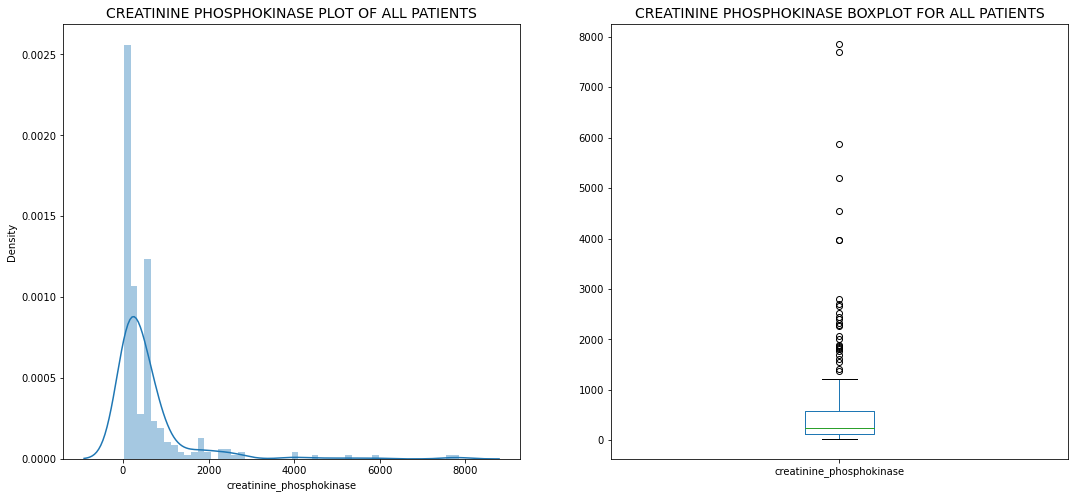

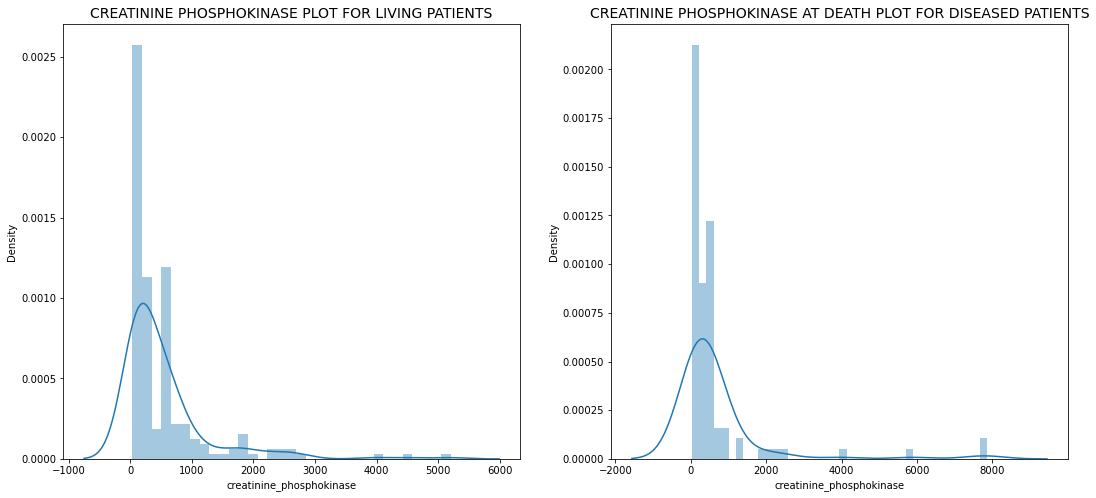

In [24]:
# plotting 'creatinine_phosphokinase' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['creatinine_phosphokinase'])
plt.title('CREATININE PHOSPHOKINASE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['creatinine_phosphokinase'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('CREATININE PHOSPHOKINASE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'creatinine_phosphokinase' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['creatinine_phosphokinase'])
plt.title('CREATININE PHOSPHOKINASE PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'creatinine_phosphokinase' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['creatinine_phosphokinase'])
plt.title('CREATININE PHOSPHOKINASE AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of ejection_fraction Distribution**

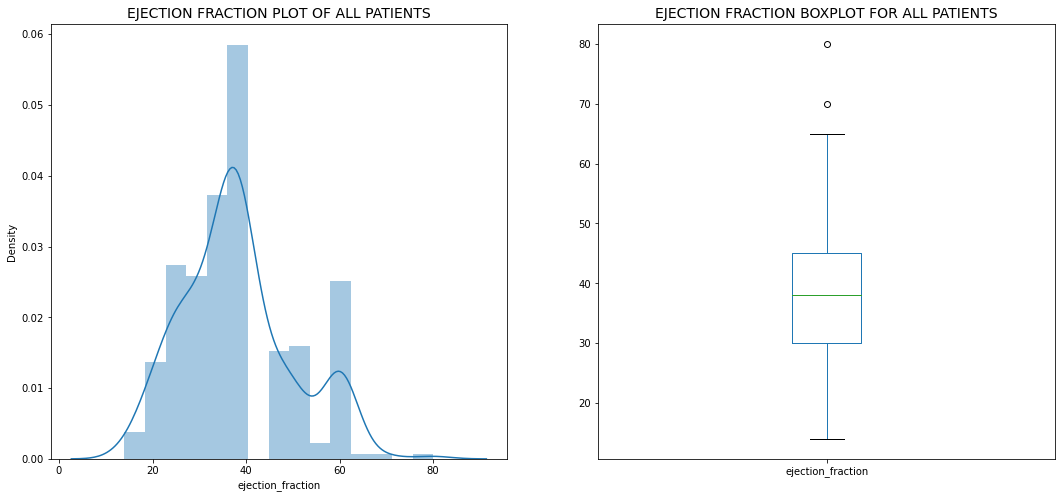

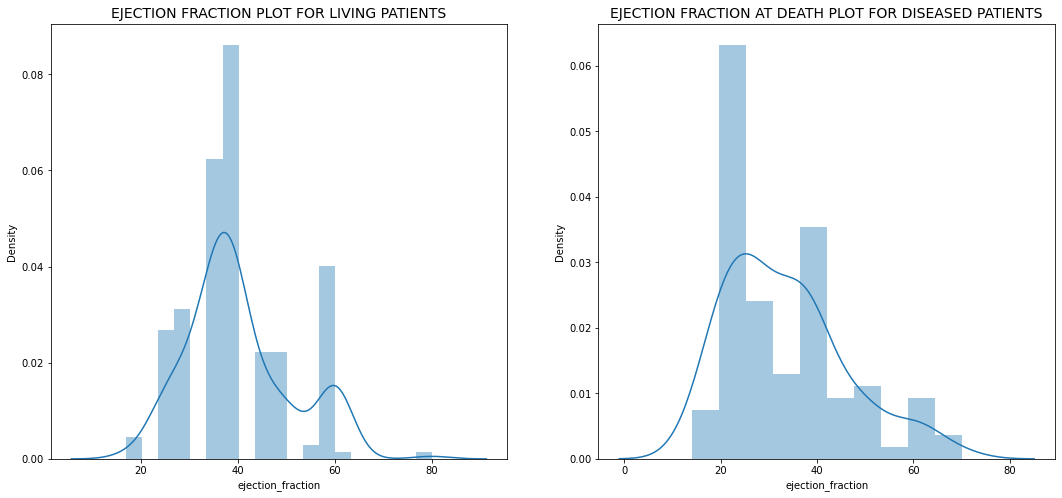

In [25]:
# plotting 'ejection_fraction' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['ejection_fraction'])
plt.title('EJECTION FRACTION PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['ejection_fraction'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('EJECTION FRACTION BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'ejection_fraction' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['ejection_fraction'])
plt.title('EJECTION FRACTION PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'ejection_fraction' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['ejection_fraction'])
plt.title('EJECTION FRACTION AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of platelets Distribution**

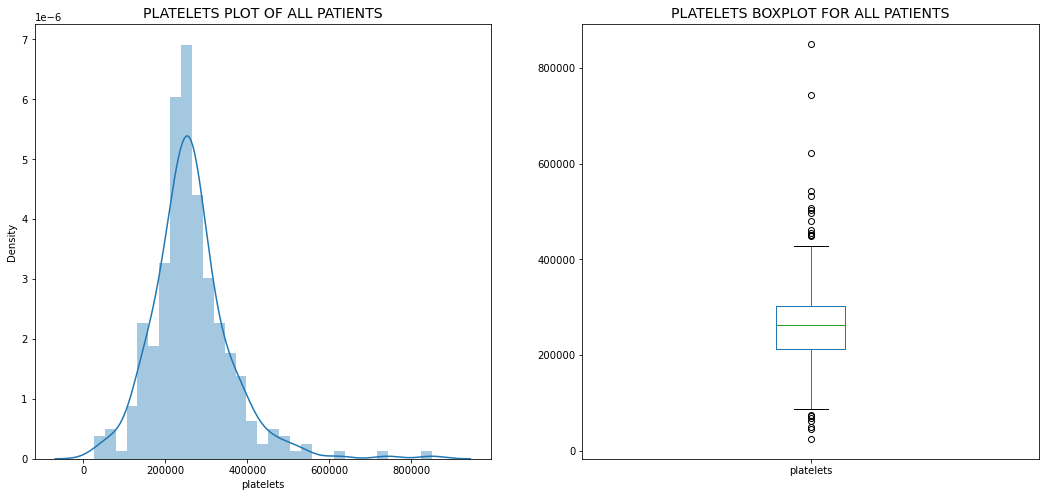

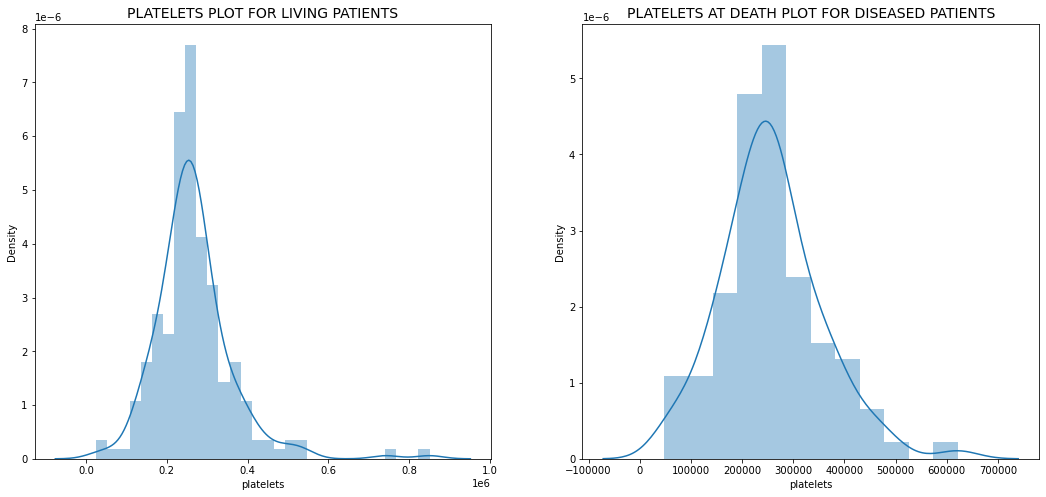

In [26]:
# plotting 'platelets' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['platelets'])
plt.title('PLATELETS PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['platelets'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('PLATELETS BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'platelets' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['platelets'])
plt.title('PLATELETS PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'platelets' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['platelets'])
plt.title('PLATELETS AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of serum_creatinine Distribution**

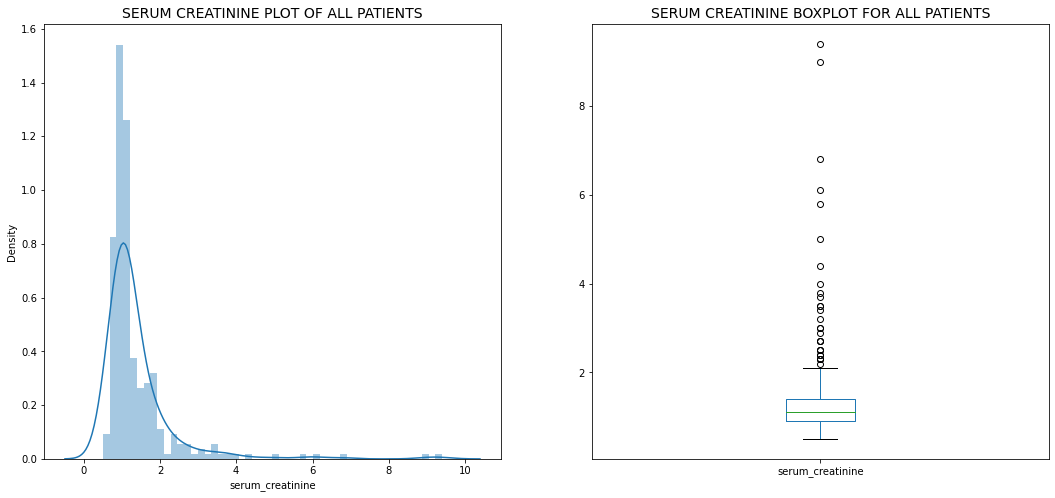

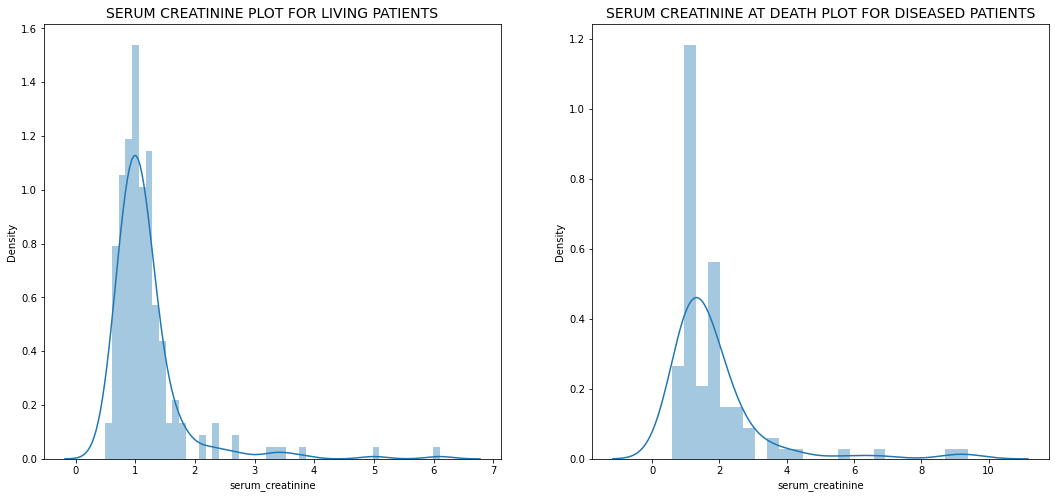

In [27]:
# plotting 'serum_creatinine' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['serum_creatinine'])
plt.title('SERUM CREATININE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['serum_creatinine'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('SERUM CREATININE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'serum_creatinine' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['serum_creatinine'])
plt.title('SERUM CREATININE PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'serum_creatinine' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['serum_creatinine'])
plt.title('SERUM CREATININE AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of serum_sodium Distribution**

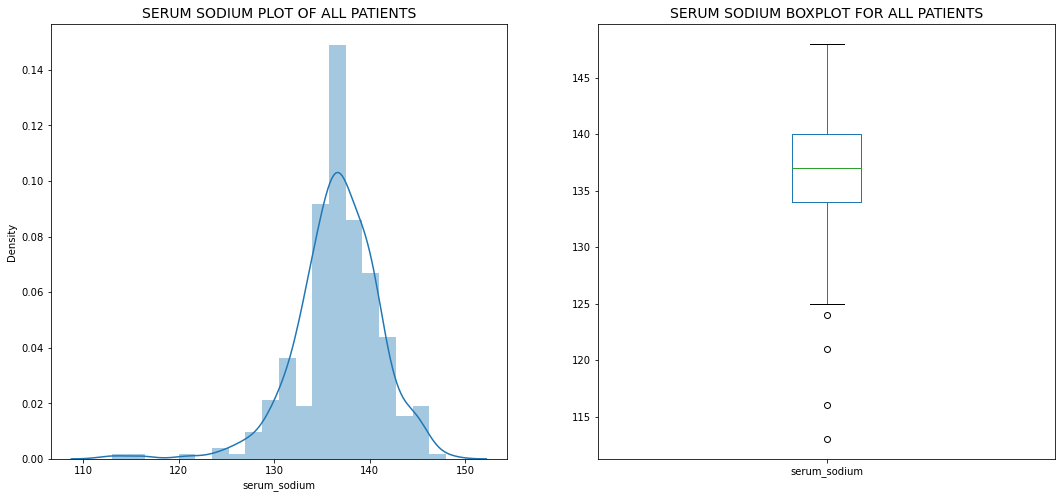

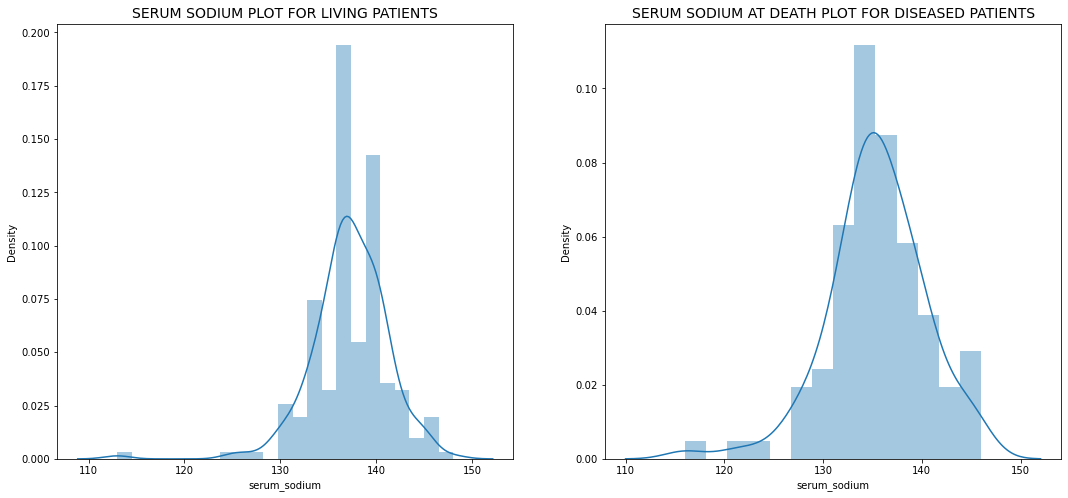

In [28]:
# plotting 'serum_sodium' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['serum_sodium'])
plt.title('SERUM SODIUM PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['serum_sodium'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('SERUM SODIUM BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'serum_sodium' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['serum_sodium'])
plt.title('SERUM SODIUM PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'serum_sodium' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['serum_sodium'])
plt.title('SERUM SODIUM AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

**Review of time Distribution**

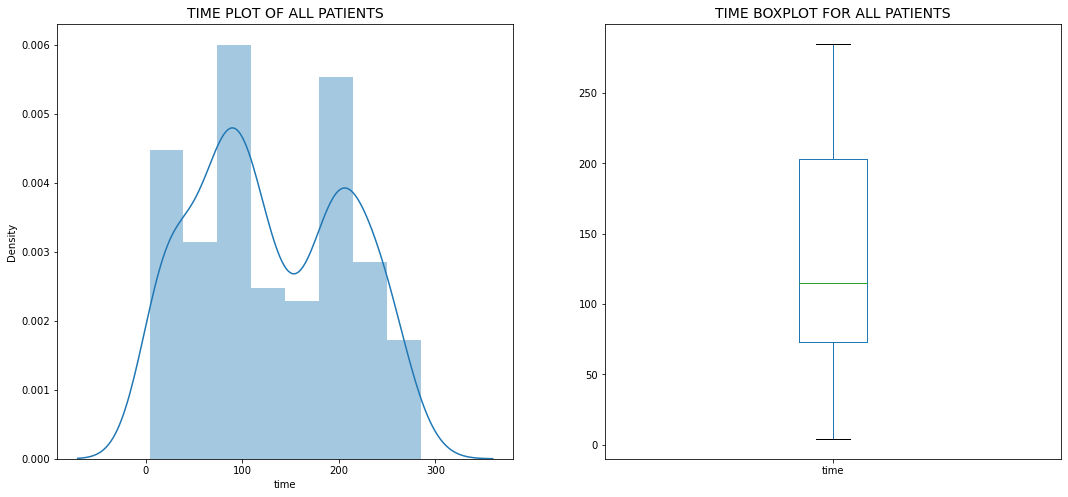

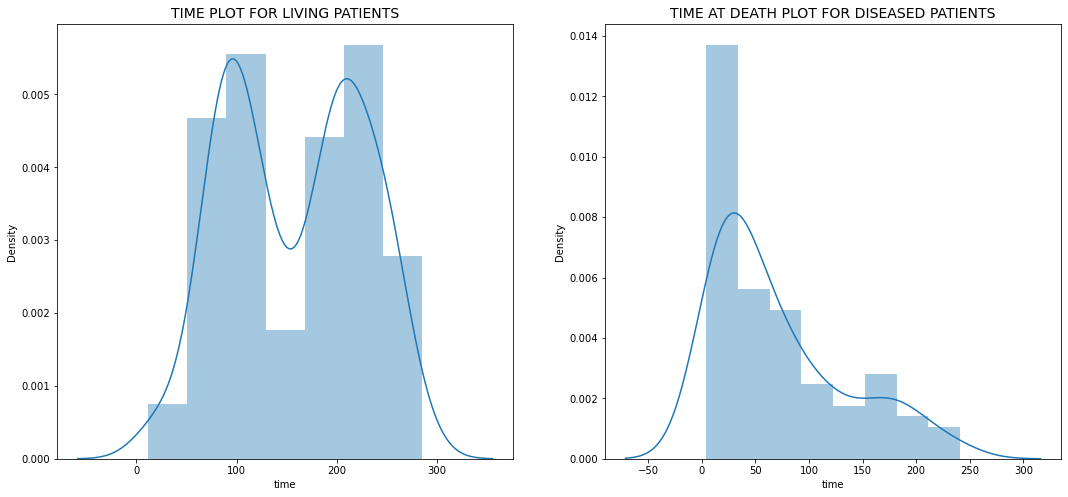

In [29]:
# plotting 'time' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df4['time'])
plt.title('TIME PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4['time'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('TIME BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'time' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(DEATH_EVENT0['time'])
plt.title('TIME PLOT FOR LIVING PATIENTS', fontsize=14, weight='light')

# plotting 'time' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(DEATH_EVENT1['time'])
plt.title('TIME AT DEATH PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light')


plt.show()

In [30]:
# sns.pairplot(heart_df, hue = 'DEATH_EVENT', palette='cubehelix', vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
#                                                                  'serum_creatinine', 'serum_sodium', 'time'])
# plt.show()

# Analysis of Categorical Attributes

In [31]:
# summary statistics of categorical attributes
df4.describe(include =[np.object])

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,No anaemia,No diabetes,High_BP,Male,No,Alive
freq,170,174,194,194,203,203


**Review of anaemia Distribution**

In [32]:
df4.groupby('anaemia').size()

anaemia
Has anaemia    129
No anaemia     170
dtype: int64

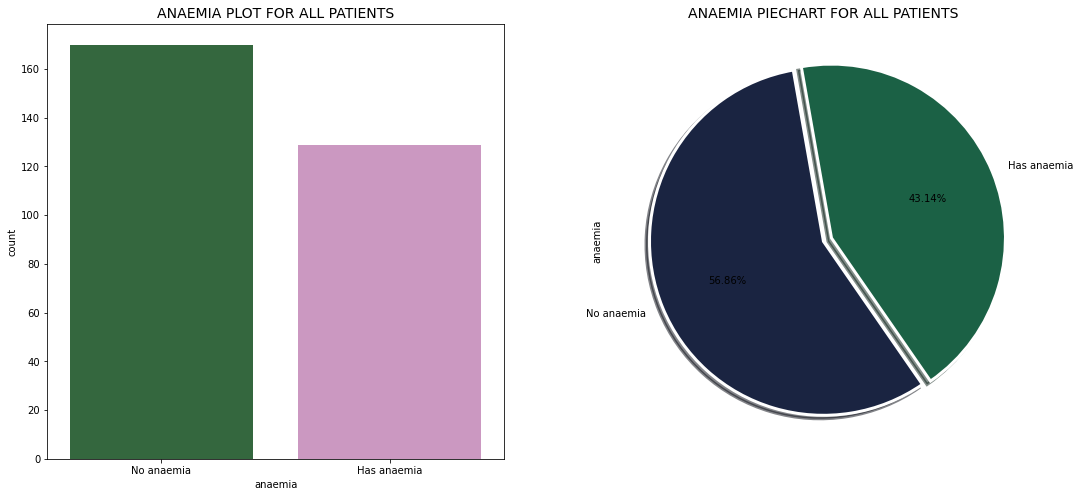

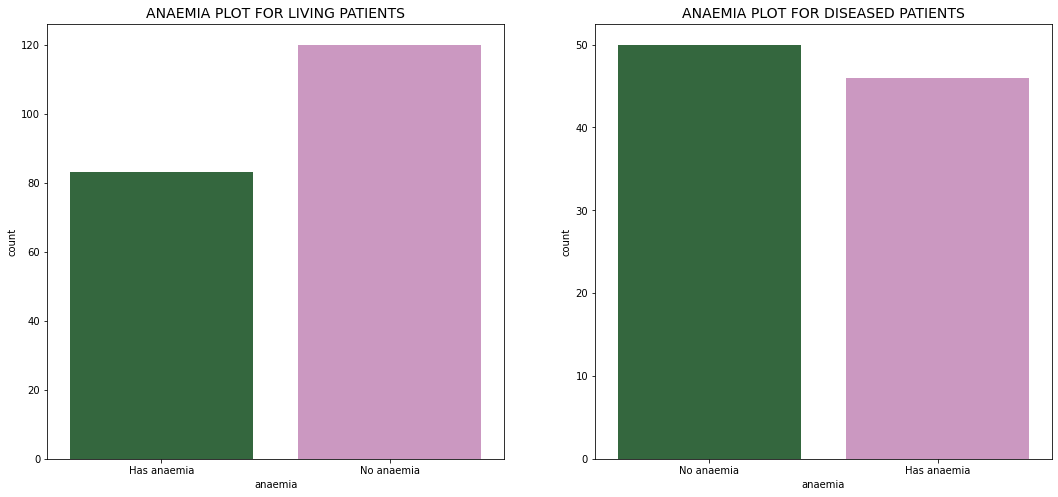

In [33]:
# plotting 'anaemia' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df4['anaemia'], palette='cubehelix')
plt.title('ANAEMIA PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4["anaemia"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("cubehelix"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("ANAEMIA PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'anaemia' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(DEATH_EVENT0['anaemia'], palette='cubehelix')
plt.title('ANAEMIA PLOT FOR LIVING PATIENTS', fontsize=14, weight='light' )

# plotting 'anaemia' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(DEATH_EVENT1['anaemia'], palette='cubehelix')
plt.title('ANAEMIA PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light' )
plt.show()

In [34]:
# Distribution of patients based on anaemia
plot_criteria= ['anaemia', 'DEATH_EVENT']
cm = sns.light_palette("purple", as_cmap=True)
(round(pd.crosstab(df4[plot_criteria[0]], df4[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

DEATH_EVENT,Alive,Dead
anaemia,,
Has anaemia,40.890000,47.920000
No anaemia,59.110000,52.080000


**Distribution of diabetes Pain Type**

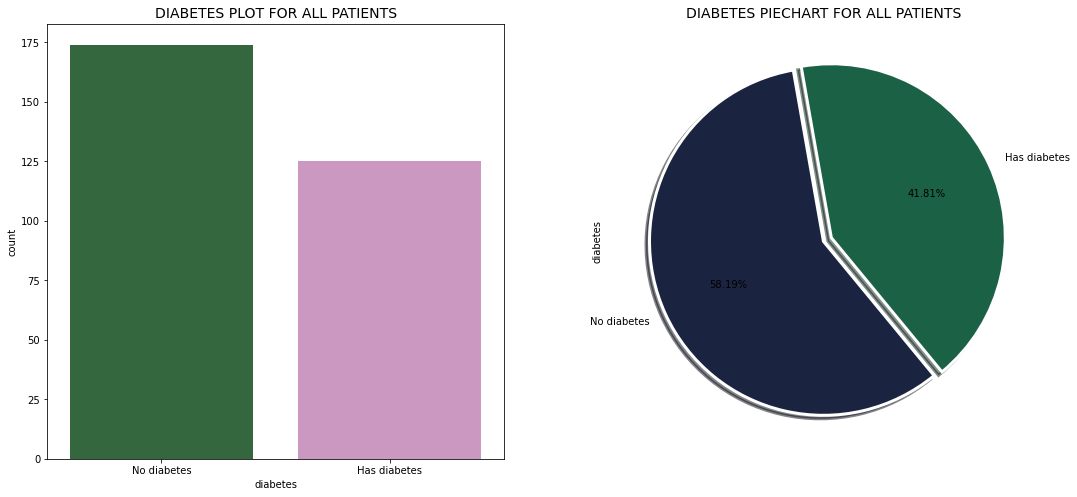

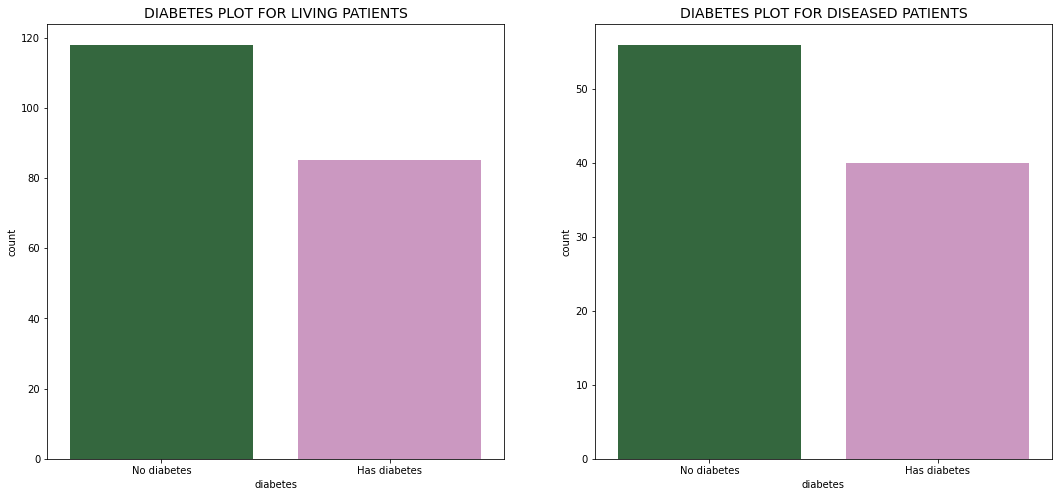

In [35]:
# plotting 'diabetes' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df4['diabetes'], palette='cubehelix')
plt.title('DIABETES PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4["diabetes"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("cubehelix"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("DIABETES PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'diabetes' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(DEATH_EVENT0['diabetes'], palette='cubehelix')
plt.title('DIABETES PLOT FOR LIVING PATIENTS', fontsize=14, weight='light' )

# plotting 'diabetes' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(DEATH_EVENT1['diabetes'], palette='cubehelix')
plt.title('DIABETES PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light' )
plt.show()

In [36]:
# Distribution of patients based on diabetes
plot_criteria= ['diabetes', 'DEATH_EVENT']
cm = sns.light_palette("purple", as_cmap=True)
(round(pd.crosstab(df4[plot_criteria[0]], df4[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

DEATH_EVENT,Alive,Dead
diabetes,,
Has diabetes,41.870000,41.670000
No diabetes,58.130000,58.330000


**Distribution of high_blood_pressure**

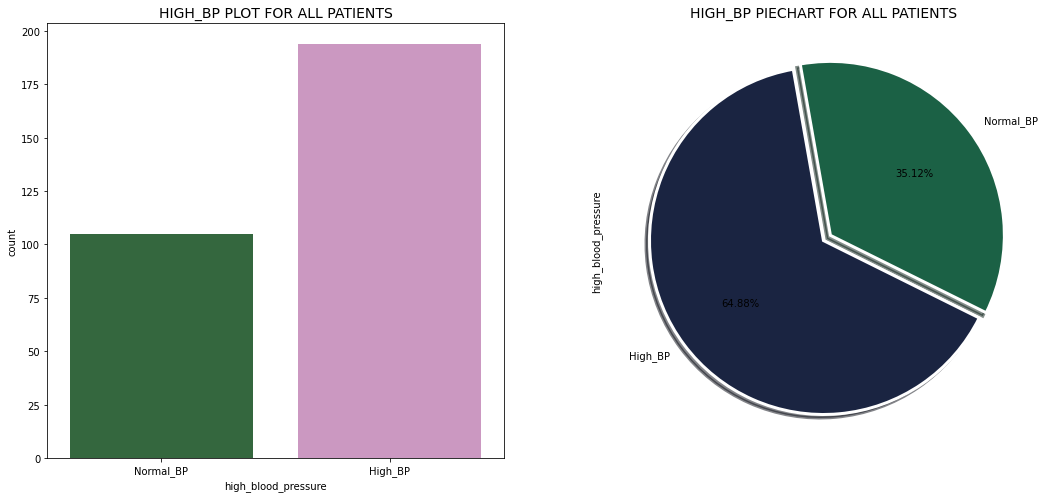

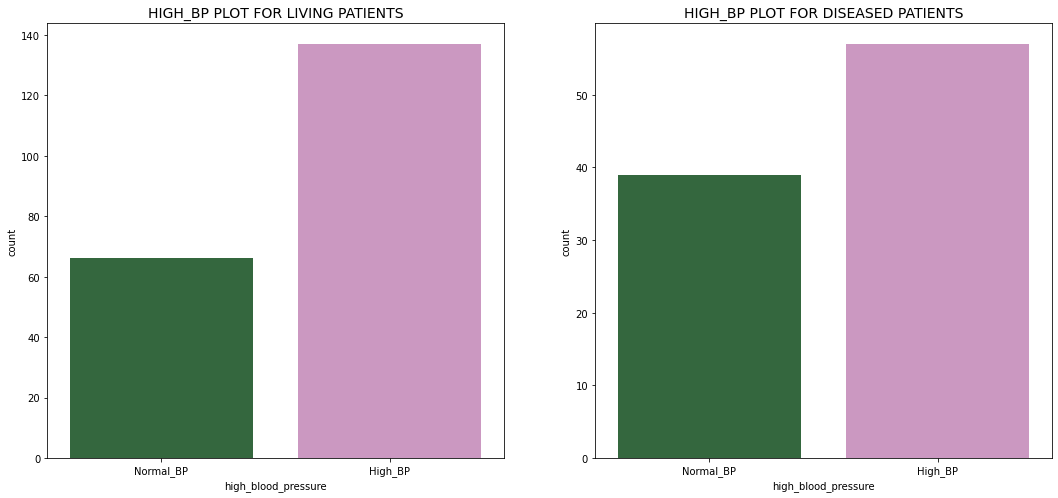

In [37]:
# plotting 'high_blood_pressure' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df4['high_blood_pressure'], palette='cubehelix')
plt.title('HIGH_BP PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4["high_blood_pressure"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("cubehelix"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("HIGH_BP PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'high_blood_pressure' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(DEATH_EVENT0['high_blood_pressure'], palette='cubehelix')
plt.title('HIGH_BP PLOT FOR LIVING PATIENTS', fontsize=14, weight='light' )

# plotting 'high_blood_pressure' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(DEATH_EVENT1['high_blood_pressure'], palette='cubehelix')
plt.title('HIGH_BP PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light' )
plt.show()

In [38]:
# Distribution of patients based on high_blood_pressure
plot_criteria= ['high_blood_pressure', 'DEATH_EVENT']
cm = sns.light_palette("purple", as_cmap=True)
(round(pd.crosstab(df4[plot_criteria[0]], df4[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

DEATH_EVENT,Alive,Dead
high_blood_pressure,,
High_BP,67.490000,59.380000
Normal_BP,32.510000,40.620000


**Distribution of sex**

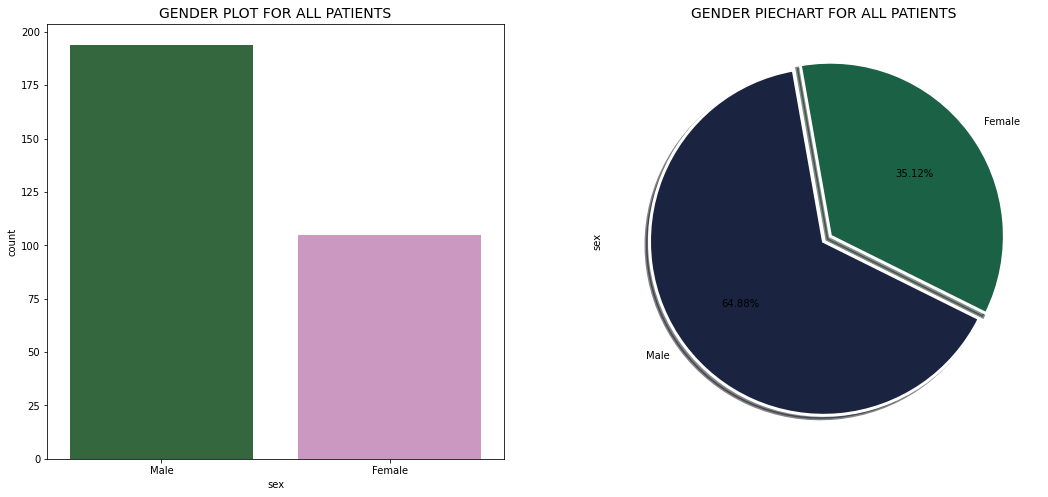

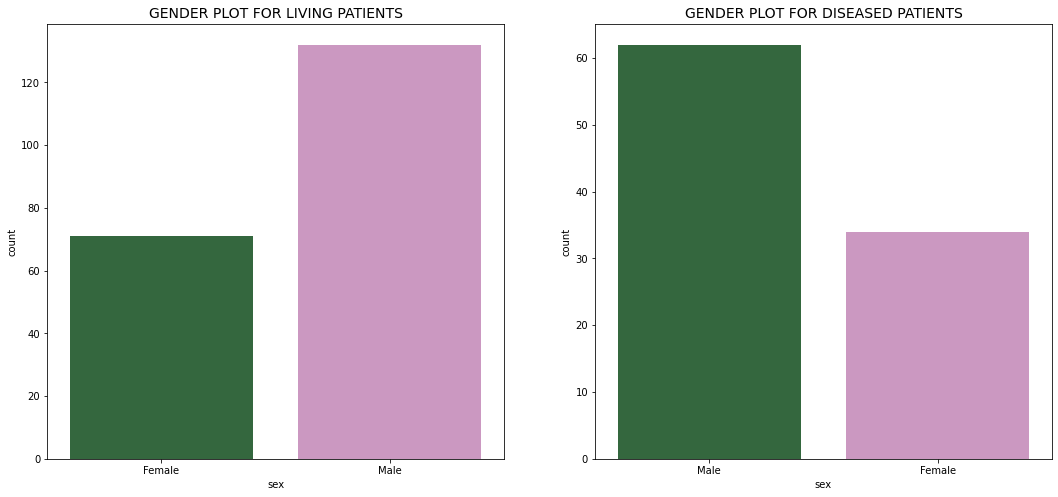

In [39]:
# plotting 'sex' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df4['sex'], palette='cubehelix')
plt.title('GENDER PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4["sex"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("cubehelix"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'sex' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(DEATH_EVENT0['sex'], palette='cubehelix')
plt.title('GENDER PLOT FOR LIVING PATIENTS', fontsize=14, weight='light' )

# plotting 'sex' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(DEATH_EVENT1['sex'], palette='cubehelix')
plt.title('GENDER PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light' )
plt.show()

In [40]:
# Distribution of patients based on sex
plot_criteria= ['sex', 'DEATH_EVENT']
cm = sns.light_palette("purple", as_cmap=True)
(round(pd.crosstab(df4[plot_criteria[0]], df4[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

DEATH_EVENT,Alive,Dead
sex,,
Female,34.980000,35.420000
Male,65.020000,64.580000


**Distribution of smoking Angina**

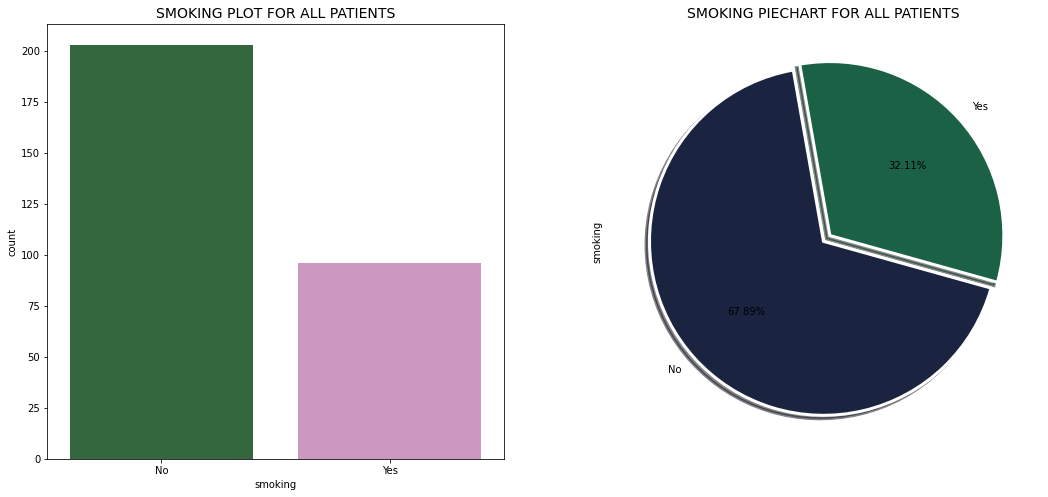

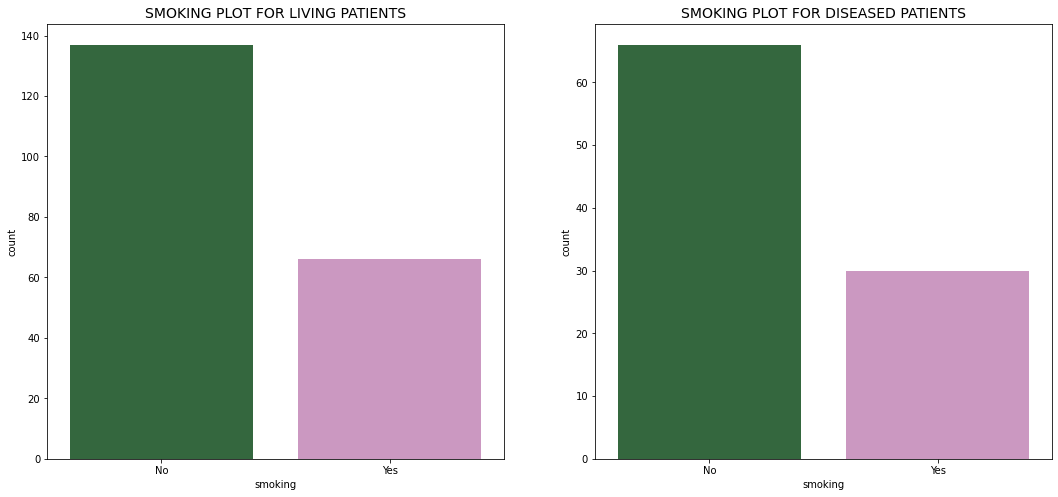

In [41]:
# plotting 'smoking' for the entire distribution, 

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df4['smoking'], palette='cubehelix')
plt.title('SMOKING PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df4["smoking"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("cubehelix"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("SMOKING PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )

# plotting 'smoking' for living patients with heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(DEATH_EVENT0['smoking'], palette='cubehelix')
plt.title('SMOKING PLOT FOR LIVING PATIENTS', fontsize=14, weight='light' )

# plotting 'smoking' for deceased patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(DEATH_EVENT1['smoking'], palette='cubehelix')
plt.title('SMOKING PLOT FOR DISEASED PATIENTS', fontsize=14, weight='light' )
plt.show()

In [42]:
# Distribution of patients based on smoking
plot_criteria= ['smoking', 'DEATH_EVENT']
cm = sns.light_palette("purple", as_cmap=True)
(round(pd.crosstab(df4[plot_criteria[0]], df4[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

DEATH_EVENT,Alive,Dead
smoking,,
No,67.490000,68.750000
Yes,32.510000,31.250000


# Machine Learning Part B

In [43]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [44]:
# Converting categorical attributes back to 1 & 0 for ML modelling

df4['anaemia'][df4['anaemia'] == 'No anaemia'] = 0
df4['anaemia'][df4['anaemia'] == 'Has anaemia'] = 1

df4['diabetes'][df4['diabetes'] == 'No diabetes'] = 0
df4['diabetes'][df4['diabetes'] == 'Has diabetes'] = 1

df4['high_blood_pressure'][df4['high_blood_pressure'] == 'High_BP'] = 0
df4['high_blood_pressure'][df4['high_blood_pressure'] == 'Normal_BP'] = 1

df4['sex'][df4['sex'] == 'Female'] = 0
df4['sex'][df4['sex'] == 'Male'] = 1

df4['smoking'][df4['smoking'] == 'No'] = 0
df4['smoking'][df4['smoking'] == 'Yes'] = 1

df4['DEATH_EVENT'][df4['DEATH_EVENT'] == 'Dead'] = 1
df4['DEATH_EVENT'][df4['DEATH_EVENT'] == 'Alive'] = 0


df4['anaemia'] = df4['anaemia'].astype(np.int64)
df4['diabetes'] = df4['diabetes'].astype(np.int64)
df4['high_blood_pressure'] = df4['high_blood_pressure'].astype(np.int64)
df4['sex'] = df4['sex'].astype(np.int64)
df4['smoking'] = df4['smoking'].astype(np.int64)
df4['DEATH_EVENT'] = df4['DEATH_EVENT'].astype(np.int64)

df4.head(2)



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [45]:
# checking shape of dataset after outlier removal
df4.shape

(299, 13)

In [46]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
df4[columns_to_scale] = StandardScaler.fit_transform(df4[columns_to_scale])

In [47]:
df4.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


In [48]:
#seperating 'DEATH_EVENT' variable from other features
X4 = df4.drop(['DEATH_EVENT'], axis=1) 
y4 = df4['DEATH_EVENT']

In [49]:
X4.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879


In [50]:
y4.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

REchecking Correlation

<AxesSubplot:title={'center':'Correlation with DEATH_EVENT'}>

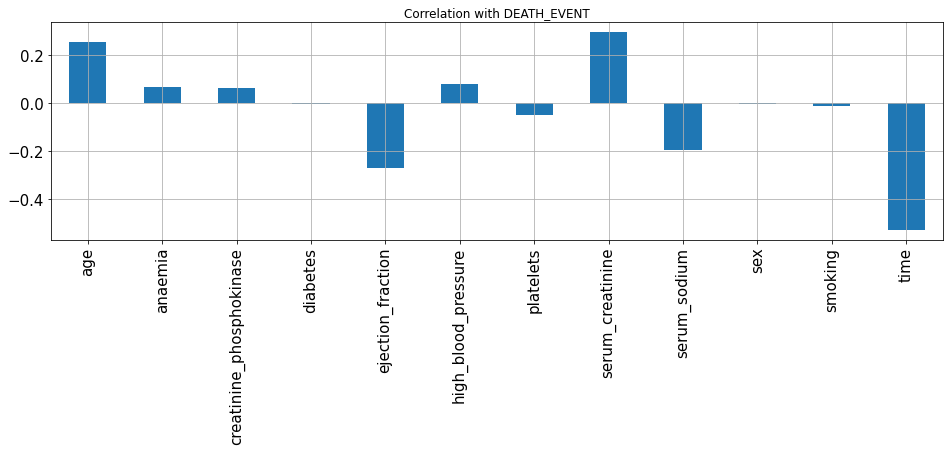

In [51]:
#Correlation with Response Variable class

X4.corrwith(y4).plot.bar(
        figsize = (16, 4), title = "Correlation with DEATH_EVENT", fontsize = 15,
        rot = 90, grid = True)


In [52]:
X_train4, X_test4,y_train4, y_test4=train_test_split(X4,y4,test_size=0.3,random_state=40)

In [53]:
## checking distribution of DEATH_EVENT variable in train test split
print(' ')
print('*****************************************************')
print("------'X4' & 'y4' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train4 Size = ', X_train4.size, '::::: X_test4 Size = ',X_test4.size)
print('y_train4 Size = ', y_train4.size, ' ::::: y_test4 Size = ', y_test4.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of DEATH_EVENT variable in training set4')
print(y_train4.value_counts())

print('Distribution of DEATH_EVENT variable in test set4')
print(y_test4.value_counts())

 
*****************************************************
------'X4' & 'y4' Test & Train Sizes-------------------
*****************************************************
X_train4 Size =  2508 ::::: X_test4 Size =  1080
y_train4 Size =  209  ::::: y_test4 Size =  90
 
*****************************************************
*****************************************************
Distribution of DEATH_EVENT variable in training set4
0    144
1     65
Name: DEATH_EVENT, dtype: int64
Distribution of DEATH_EVENT variable in test set4
0    59
1    31
Name: DEATH_EVENT, dtype: int64


In [54]:
print('*****************************************************')

print('Shape of "Training Set4" X_train4 and Y_train4')
print('X_train4 = ', X_train4.shape, ' ::::: y_train4 = ', y_train4.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets4" X_test4 and Y_test4')
print('X_test4  =  ', X_test4.shape, ' ::::: y_test4 = ', y_test4.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set4" X_train4 and Y_train4
X_train4 =  (209, 12)  ::::: y_train4 =  (209,)
 
*****************************************************
*****************************************************
Shape of "Test Sets4" X_test4 and Y_test4
X_test4  =   (90, 12)  ::::: y_test4 =  (90,)
 
*****************************************************


# Cross Validation of Models

In [55]:
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel4():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [56]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine4(X_train4, y_train4,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train4, y_train4, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [57]:
models = GetBasedModel4()
names,results = BasedLine4(X_train4, y_train4,models)

LR_L2: 0.812857 (0.082809)
LDA: 0.808095 (0.084221)
KNN7: 0.770000 (0.074385)
KNN5: 0.760714 (0.079762)
KNN9: 0.760476 (0.074810)
KNN11: 0.736667 (0.103105)
CART: 0.760476 (0.083409)
NB: 0.760476 (0.065085)
SVM Linear: 0.808095 (0.086872)
SVM RBF: 0.789048 (0.072907)
AB: 0.813571 (0.086045)
GBM: 0.832381 (0.053740)
RF_Ent100: 0.842143 (0.056404)
RF_Gini100: 0.827857 (0.060684)
ET100: 0.808571 (0.082528)
ET500: 0.794286 (0.070656)
MLP: 0.822381 (0.076132)
SGD3000: 0.736905 (0.095602)
XGB_2000: 0.827857 (0.043227)
XGB_500: 0.832619 (0.048493)
XGB_100: 0.832619 (0.057084)
XGB_1000: 0.827857 (0.043227)
ET1000: 0.794286 (0.076807)


# MODELS

# Logistics Regression

In [58]:
Lreg4 = LogisticRegression()
Lreg4.fit(X_train4, y_train4)
y_pred_Lreg4 = Lreg4.predict(X_test4)

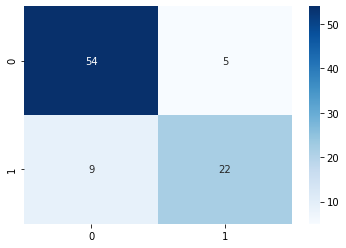

In [59]:
cm=confusion_matrix(y_test4,y_pred_Lreg4)
sns.heatmap(cm, annot=True,cmap='Blues')
#sns.heatmap(cm, annot=True,cmap='Blues', figsize=(18,6))
plt.show()

In [60]:
accuracy_score(y_test4,y_pred_Lreg4)

0.8444444444444444

In [61]:
print(classification_report(y_test4, y_pred_Lreg4))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        59
           1       0.81      0.71      0.76        31

    accuracy                           0.84        90
   macro avg       0.84      0.81      0.82        90
weighted avg       0.84      0.84      0.84        90



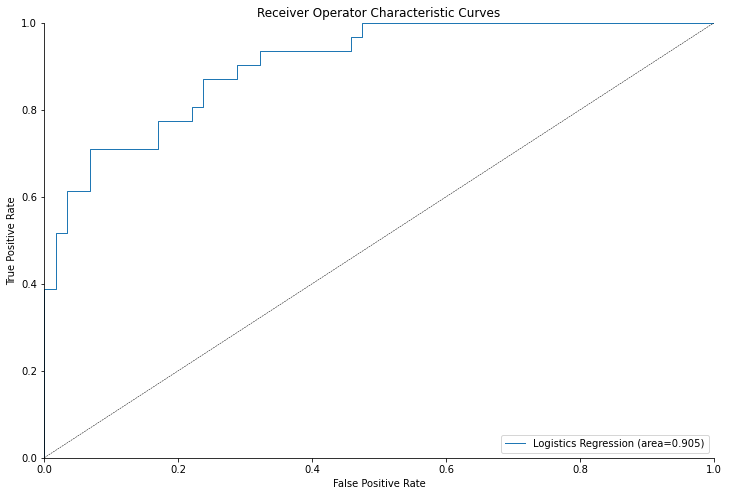

In [62]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,Lreg4.predict_proba(X_test4),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

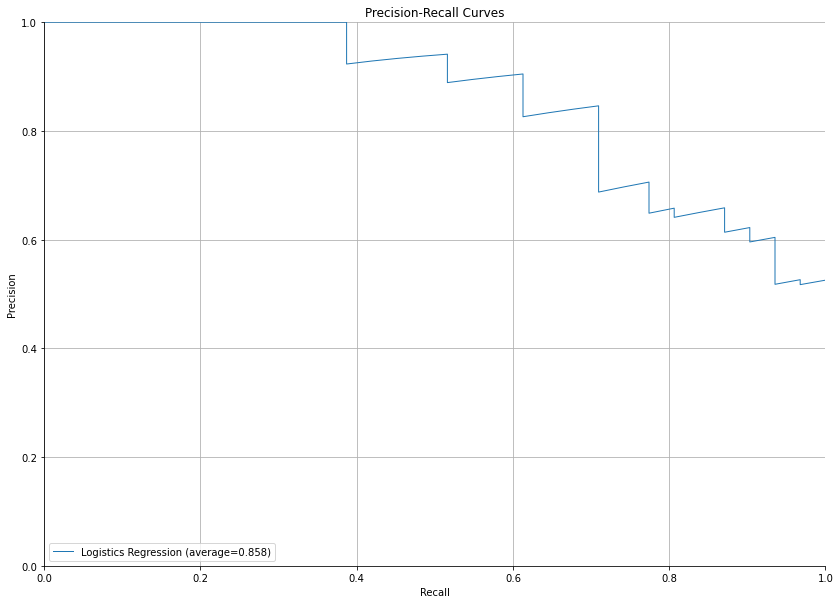

In [63]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test4,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test4, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,Lreg4.predict_proba(X_test4),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [64]:
rf_ent4 = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent4.fit(X_train4, y_train4)
y_pred_rfe4 = rf_ent4.predict(X_test4)

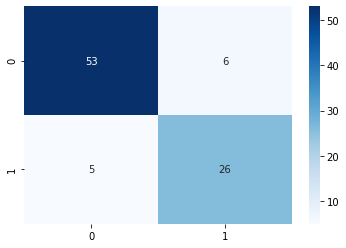

In [65]:
cm=confusion_matrix(y_test4,y_pred_rfe4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [66]:
accuracy_score(y_test4,y_pred_rfe4)

0.8777777777777778

In [67]:
print(classification_report(y_test4, y_pred_rfe4))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        59
           1       0.81      0.84      0.83        31

    accuracy                           0.88        90
   macro avg       0.86      0.87      0.87        90
weighted avg       0.88      0.88      0.88        90



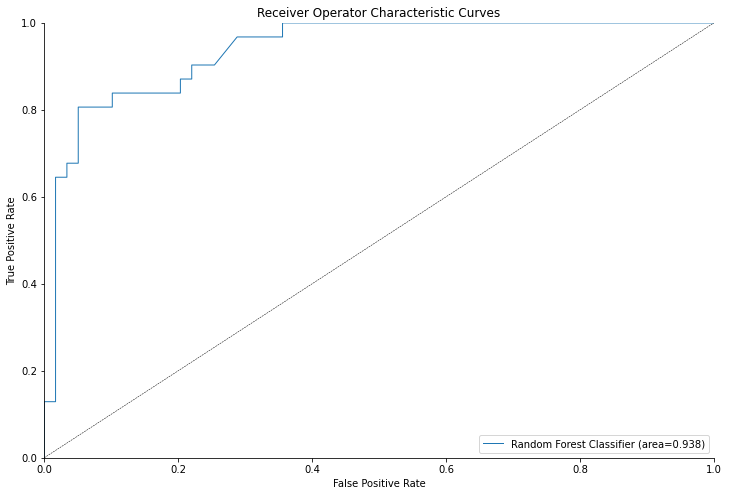

In [68]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,rf_ent4.predict_proba(X_test4),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

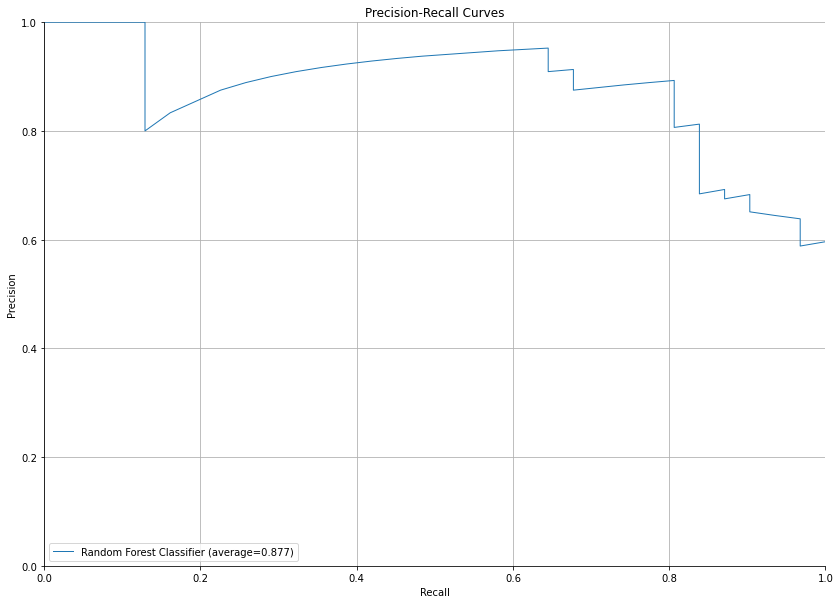

In [69]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,rf_ent4.predict_proba(X_test4),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [70]:
mlp4 = MLPClassifier()
mlp4.fit(X_train4,y_train4)
y_pred_mlp4 = mlp4.predict(X_test4)

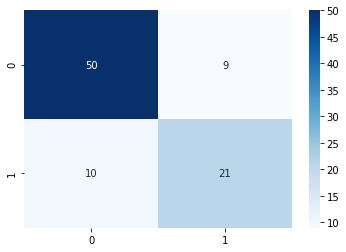

In [71]:
cm=confusion_matrix(y_test4,y_pred_mlp4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [72]:
accuracy_score(y_test4,y_pred_mlp4)

0.7888888888888889

In [73]:
print(classification_report(y_test4, y_pred_mlp4))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        59
           1       0.70      0.68      0.69        31

    accuracy                           0.79        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



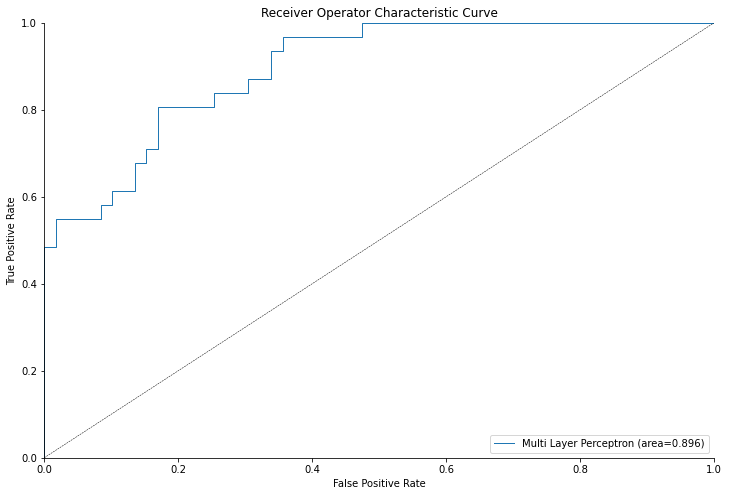

In [74]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,mlp4.predict_proba(X_test4),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

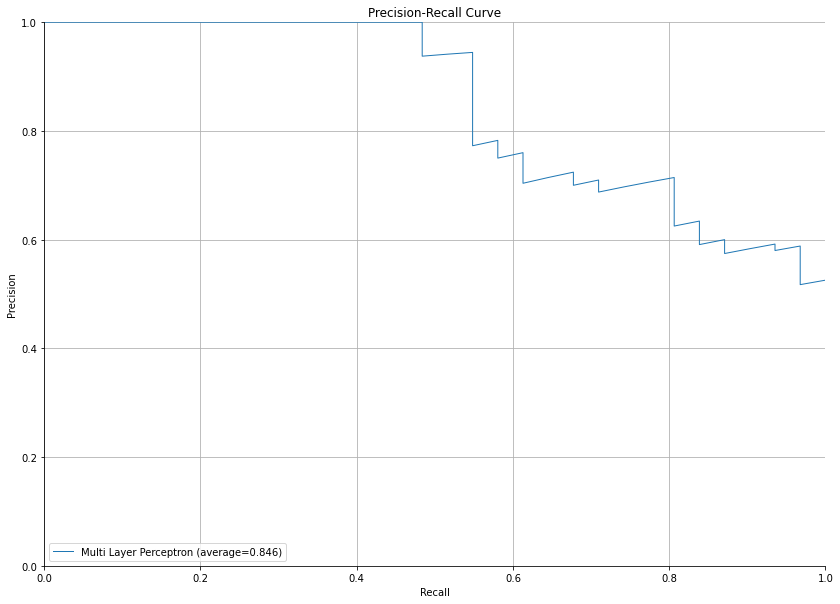

In [75]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,mlp4.predict_proba(X_test4),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [76]:
knn4 = KNeighborsClassifier(9)
knn4.fit(X_train4,y_train4)
y_pred_knn4 = knn4.predict(X_test4)

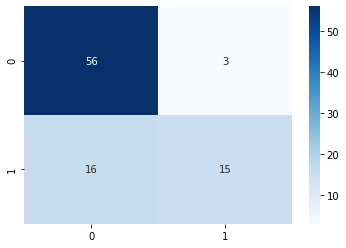

In [77]:
cm=confusion_matrix(y_test4,y_pred_knn4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [78]:
accuracy_score(y_test4,y_pred_knn4)

0.7888888888888889

In [79]:
print(classification_report(y_test4, y_pred_knn4))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        59
           1       0.83      0.48      0.61        31

    accuracy                           0.79        90
   macro avg       0.81      0.72      0.73        90
weighted avg       0.80      0.79      0.77        90



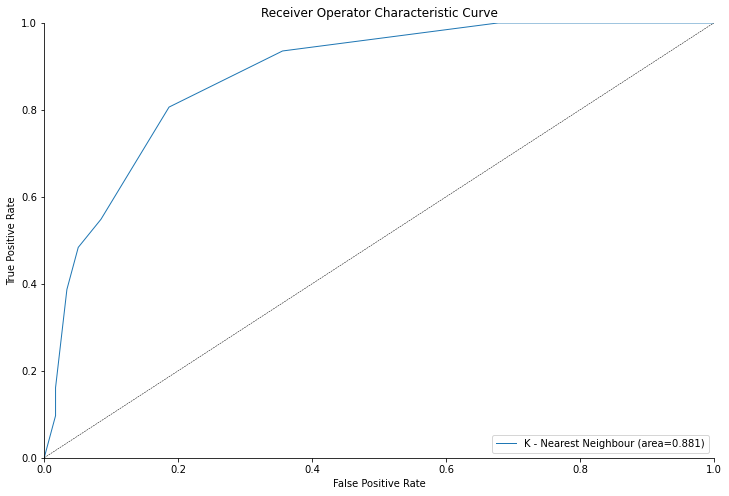

In [80]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,knn4.predict_proba(X_test4),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

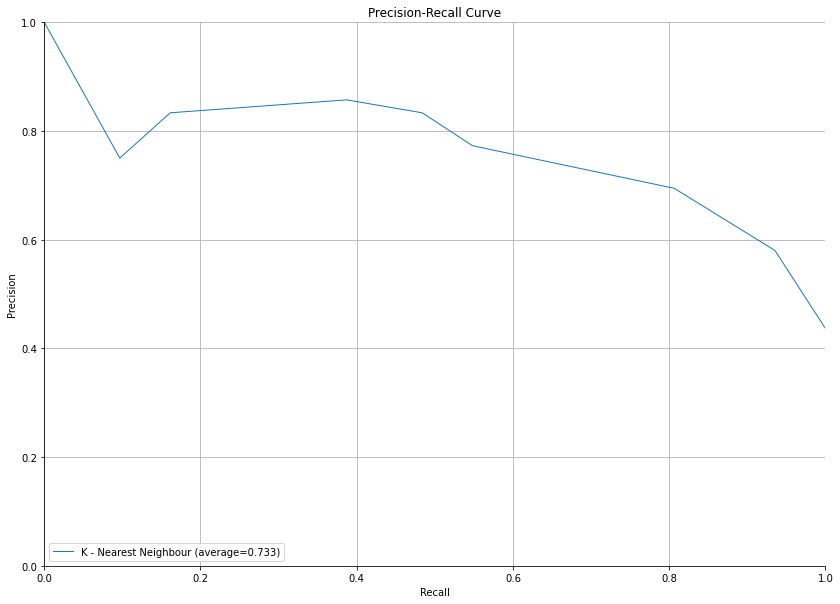

In [81]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,knn4.predict_proba(X_test4),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=500)

In [82]:
et_100_4 = ExtraTreesClassifier(n_estimators= 100)
et_100_4.fit(X_train4,y_train4)
y_pred_et_100_4 = et_100_4.predict(X_test4)

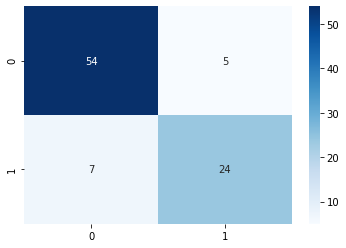

In [83]:
cm=confusion_matrix(y_test4,y_pred_et_100_4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [84]:
accuracy_score(y_test4,y_pred_et_100_4)

0.8666666666666667

In [85]:
print(classification_report(y_test4, y_pred_et_100_4))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.83      0.77      0.80        31

    accuracy                           0.87        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.87      0.87      0.87        90



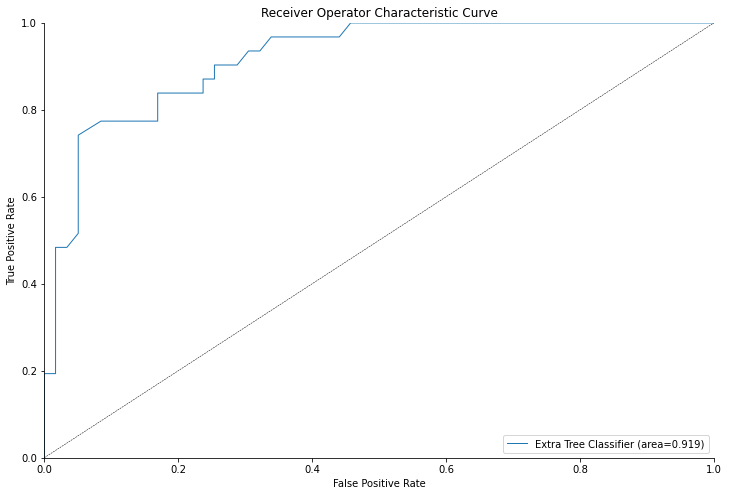

In [86]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,et_100_4.predict_proba(X_test4),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

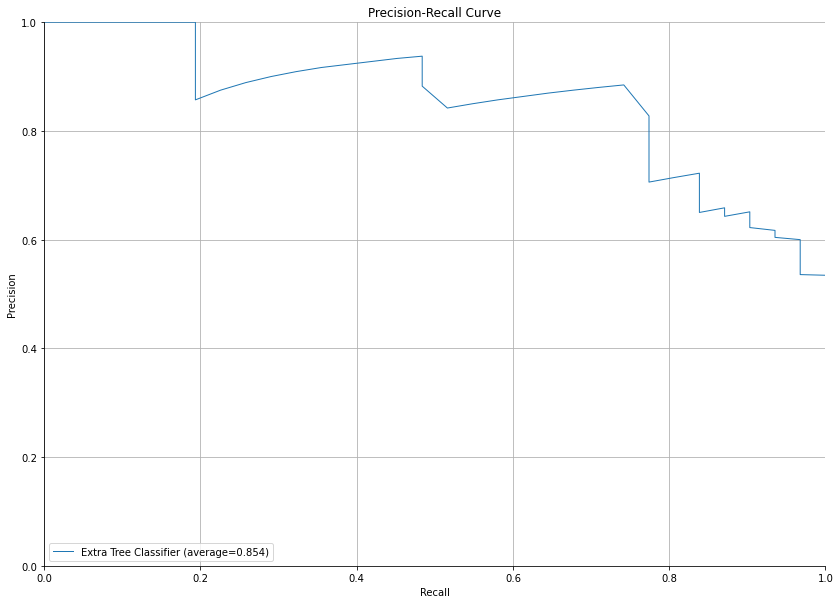

In [87]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,et_100_4.predict_proba(X_test4),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [88]:
import xgboost as xgb
xgb4 = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb4.fit(X_train4,y_train4)
y_pred_xgb4 = xgb4.predict(X_test4)

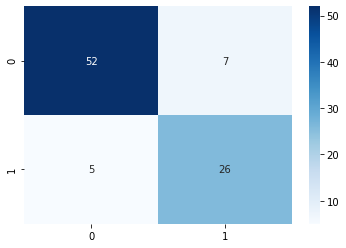

In [89]:
cm=confusion_matrix(y_test4,y_pred_xgb4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [90]:
accuracy_score(y_test4,y_pred_xgb4)

0.8666666666666667

In [91]:
print(classification_report(y_test4, y_pred_xgb4))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.79      0.84      0.81        31

    accuracy                           0.87        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.87      0.87      0.87        90



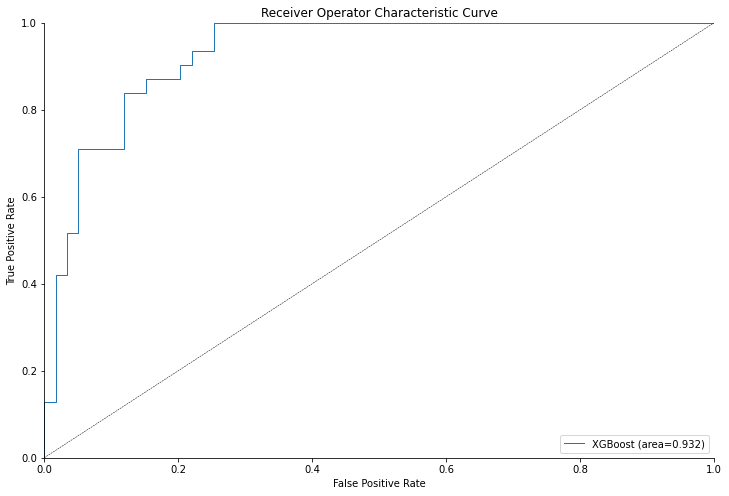

In [92]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,xgb4.predict_proba(X_test4),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

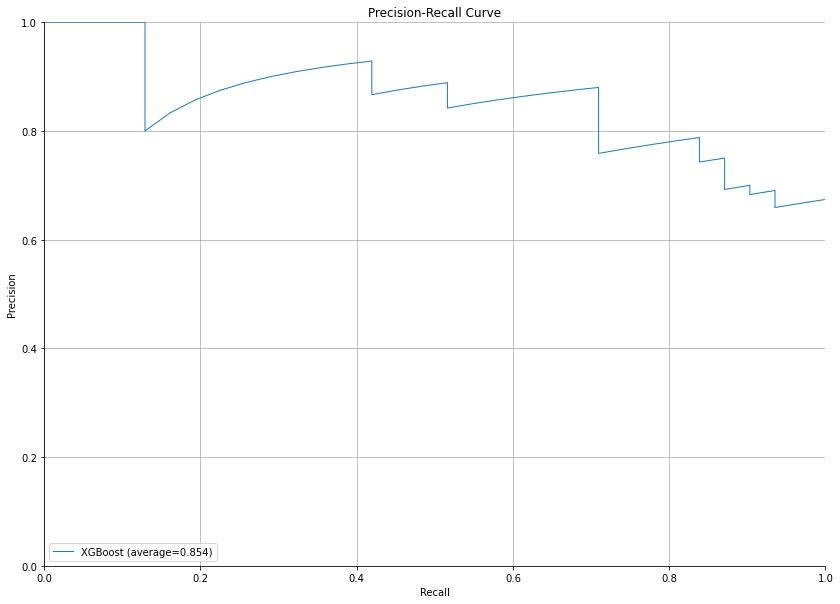

In [93]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,xgb4.predict_proba(X_test4),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [94]:
svc4 = SVC(kernel='linear',gamma='auto',probability=True)
svc4.fit(X_train4,y_train4)
y_pred_svc4 = svc4.predict(X_test4)

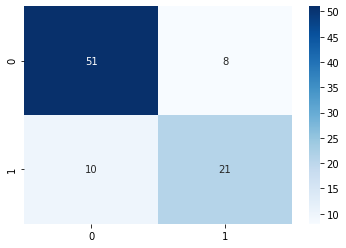

In [95]:
cm=confusion_matrix(y_test4,y_pred_svc4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [96]:
accuracy_score(y_test4,y_pred_svc4)

0.8

In [97]:
print(classification_report(y_test4, y_pred_svc4))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        59
           1       0.72      0.68      0.70        31

    accuracy                           0.80        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



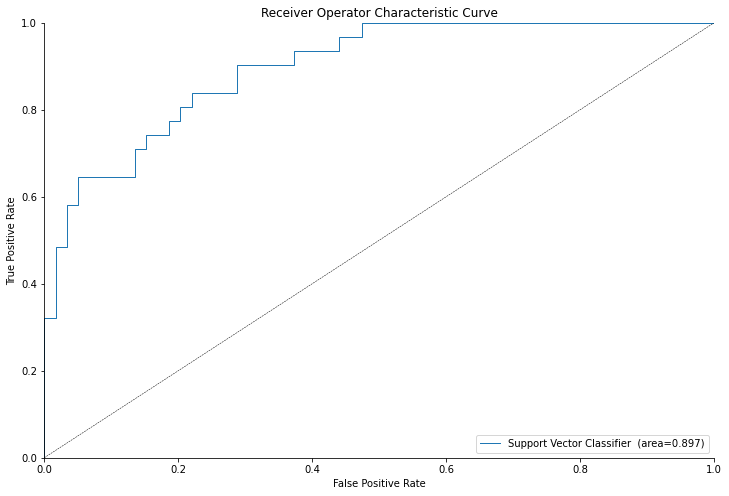

In [98]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,svc4.predict_proba(X_test4),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

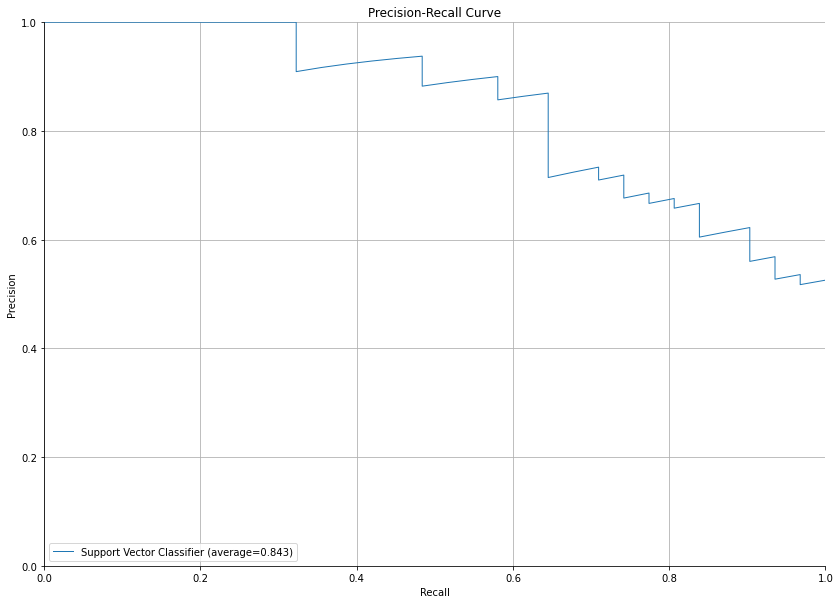

In [99]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,svc4.predict_proba(X_test4),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [100]:
sgd4 = SGDClassifier(max_iter=1000, tol=1e-4)
sgd4.fit(X_train4,y_train4)
y_pred_sgd4 = sgd4.predict(X_test4)

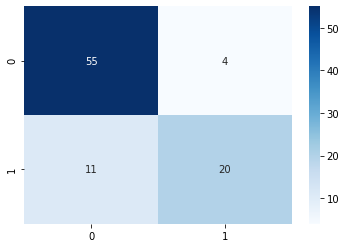

In [101]:
cm=confusion_matrix(y_test4,y_pred_sgd4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [102]:
accuracy_score(y_test4,y_pred_sgd4)

0.8333333333333334

In [103]:
print(classification_report(y_test4, y_pred_sgd4))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.83      0.65      0.73        31

    accuracy                           0.83        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [104]:
# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test4,sgd4.predict_proba(X_test4),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [105]:
# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test4,sgd4.predict_proba(X_test4),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [106]:
ada4 = AdaBoostClassifier()
ada4.fit(X_train4,y_train4)
y_pred_ada4 = ada4.predict(X_test4)

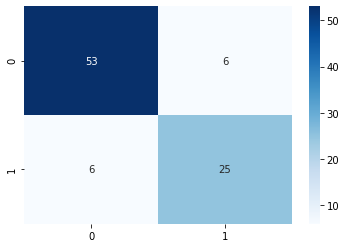

In [107]:
cm=confusion_matrix(y_test4,y_pred_ada4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [108]:
accuracy_score(y_test4,y_pred_ada4)

0.8666666666666667

In [109]:
print(classification_report(y_test4, y_pred_ada4))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.81      0.81      0.81        31

    accuracy                           0.87        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.87      0.87      0.87        90



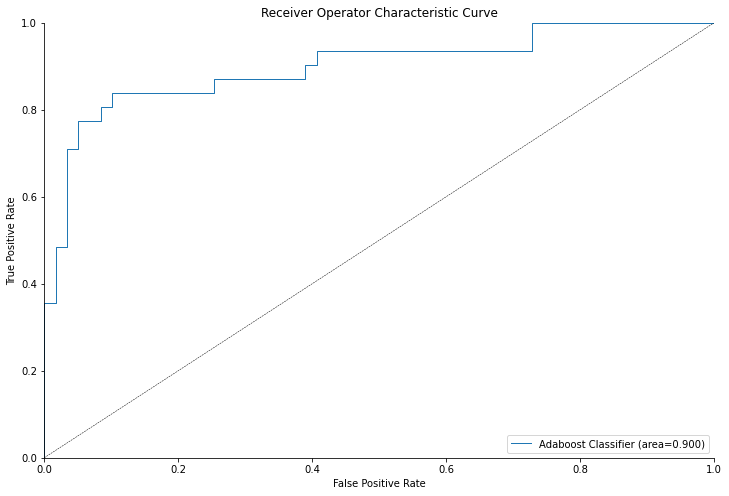

In [110]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,ada4.predict_proba(X_test4),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

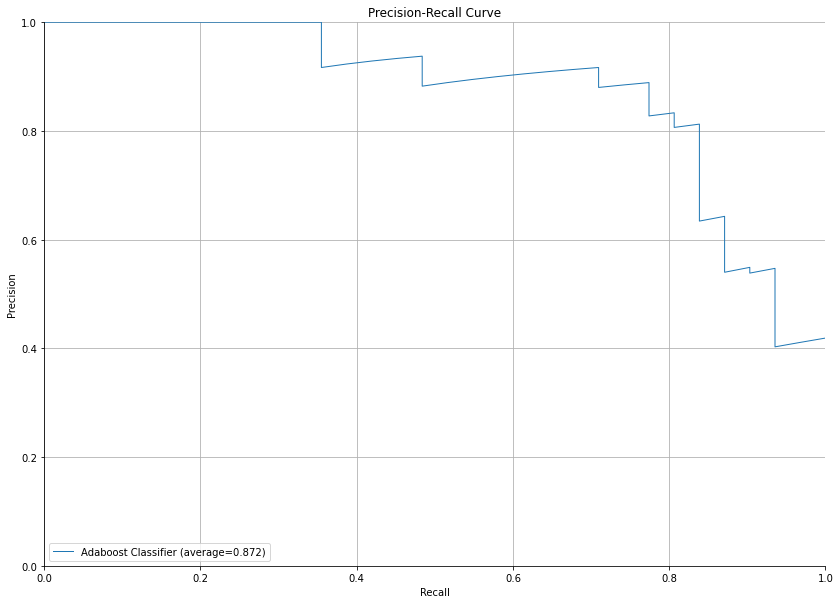

In [111]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,ada4.predict_proba(X_test4),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [112]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

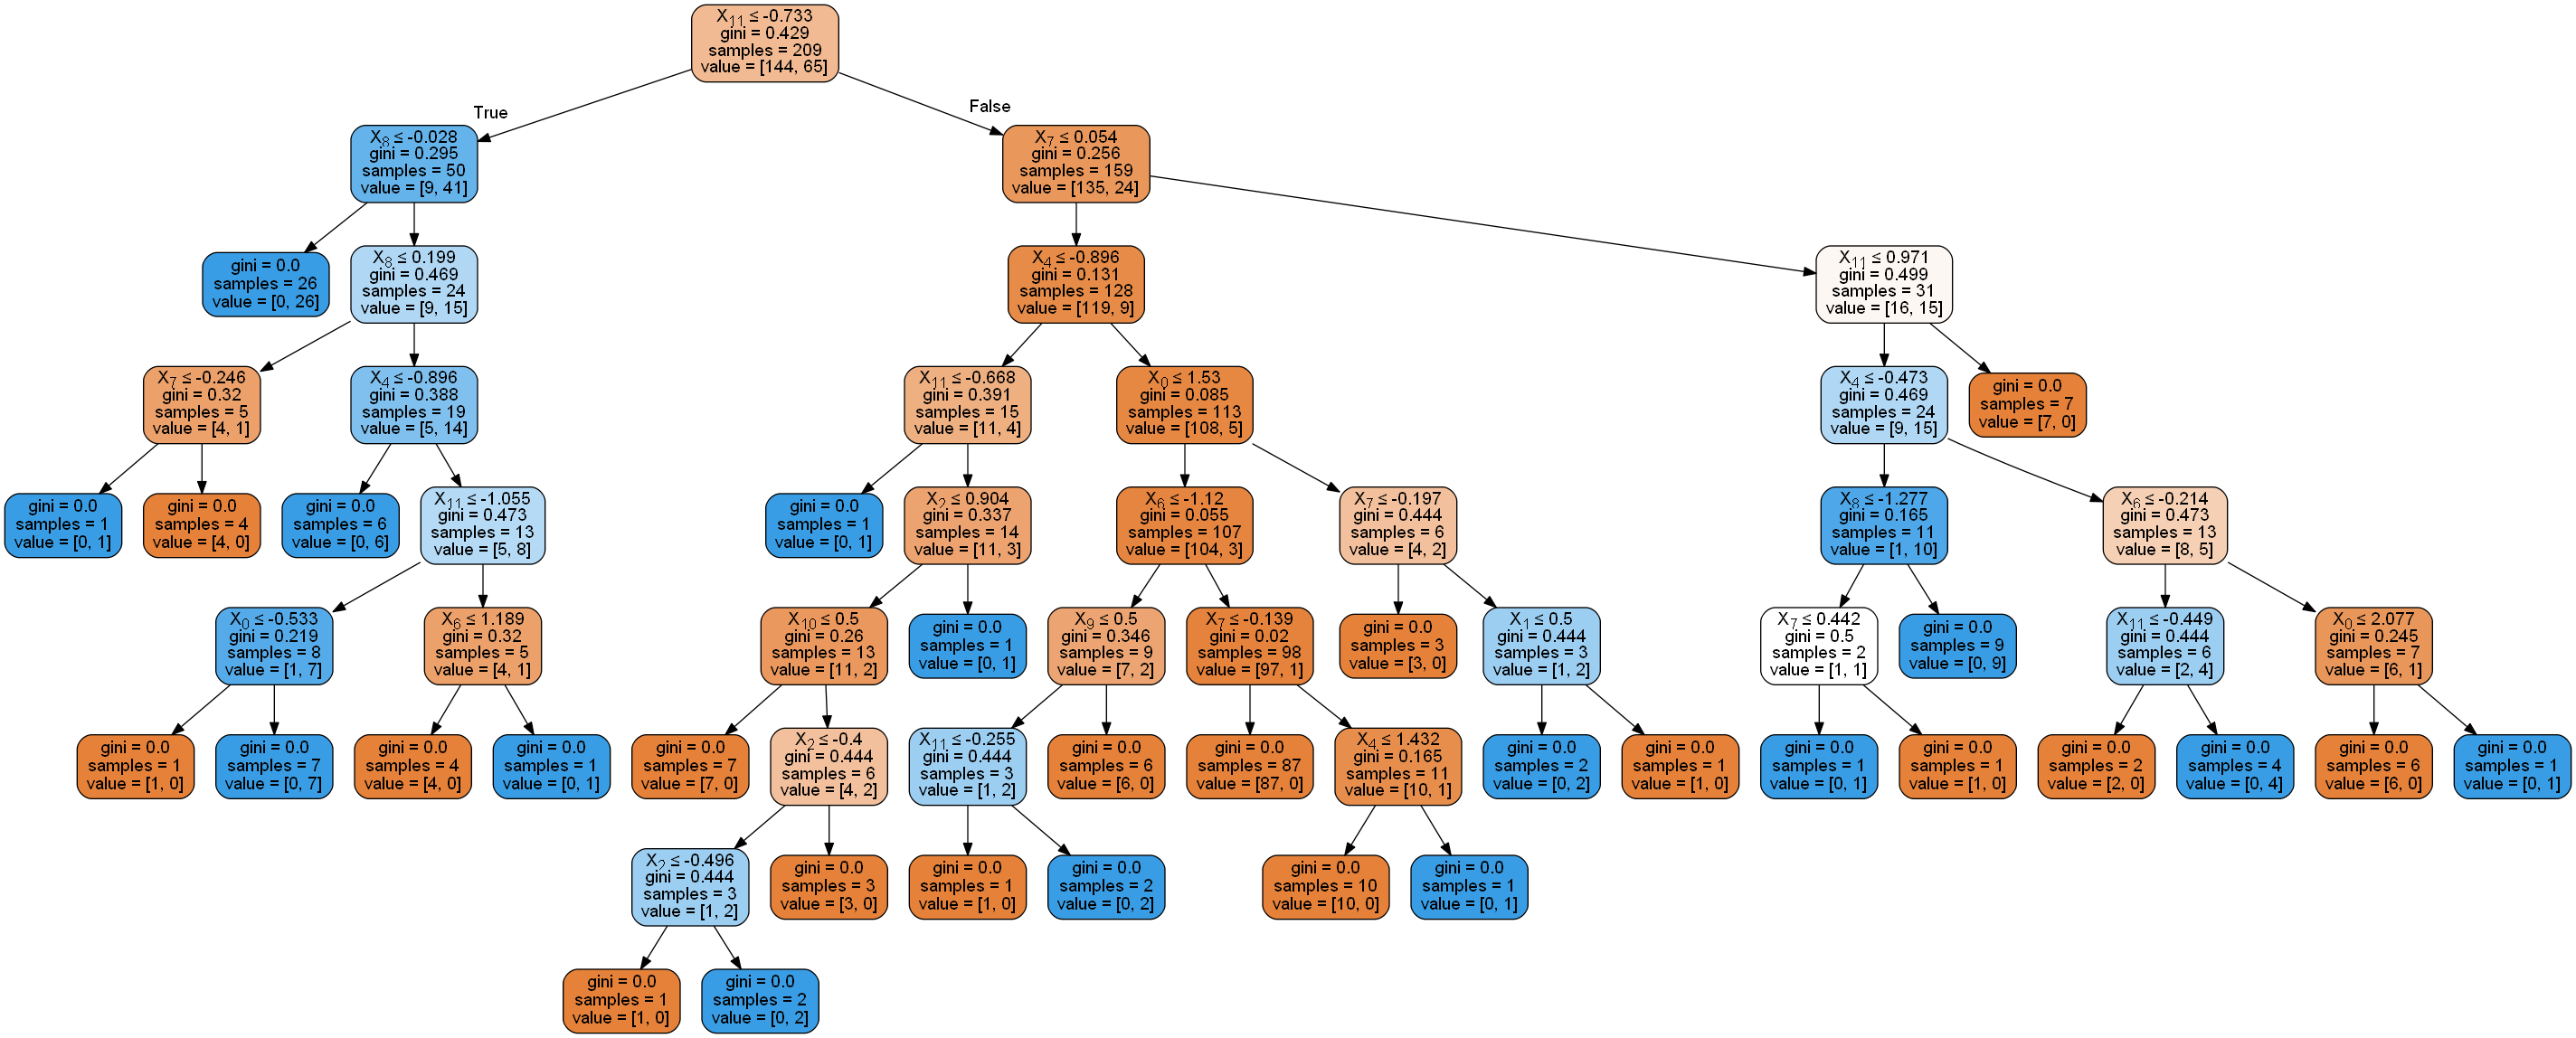

In [113]:
dtc4 = DecisionTreeClassifier()
DT4 = dtc4.fit(X_train4,y_train4)
y_pred_dtc4 = dtc4.predict(X_test4)

dot_data = StringIO()
export_graphviz(DT4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

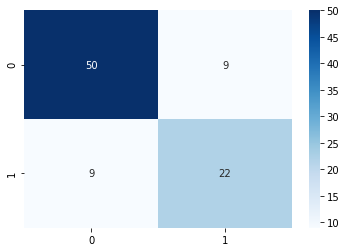

In [114]:
cm=confusion_matrix(y_test4,y_pred_dtc4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [115]:
accuracy_score(y_test4,y_pred_dtc4)

0.8

In [116]:
print(classification_report(y_test4, y_pred_dtc4))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        59
           1       0.71      0.71      0.71        31

    accuracy                           0.80        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90



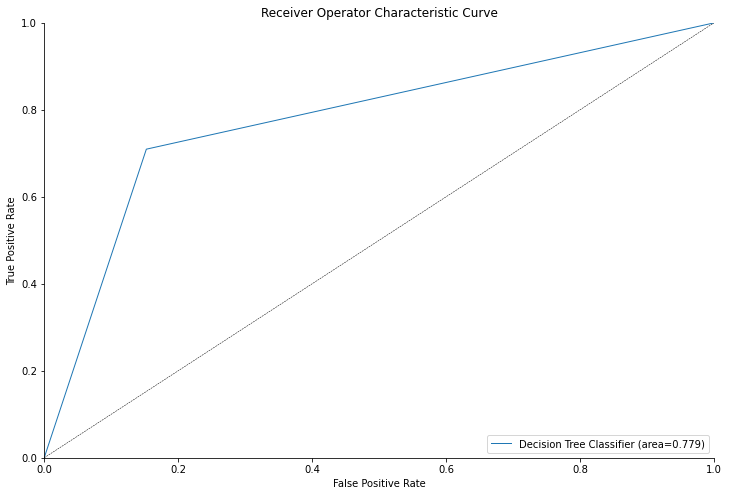

In [117]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,dtc4.predict_proba(X_test4),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

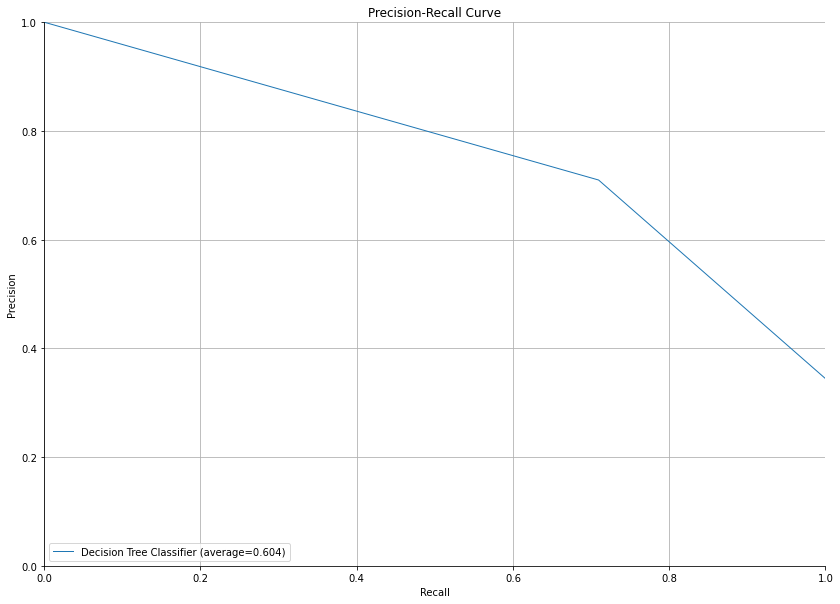

In [118]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,dtc4.predict_proba(X_test4),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [119]:
gbm4 = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm4.fit(X_train4,y_train4)
y_pred_gbm4 = gbm4.predict(X_test4)

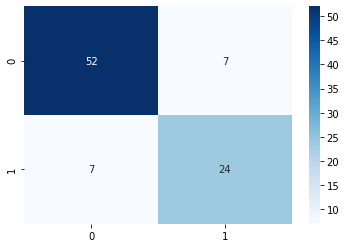

In [120]:
cm=confusion_matrix(y_test4,y_pred_gbm4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [121]:
accuracy_score(y_test4,y_pred_gbm4)

0.8444444444444444

In [122]:
print(classification_report(y_test4, y_pred_gbm4))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        59
           1       0.77      0.77      0.77        31

    accuracy                           0.84        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90



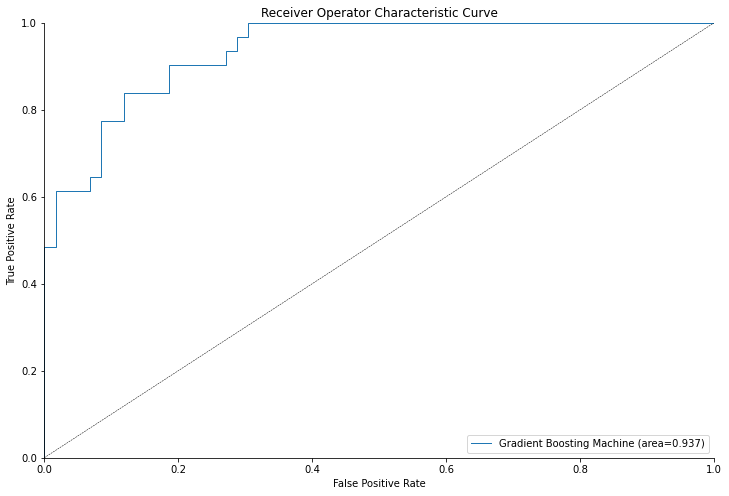

In [123]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test4,gbm4.predict_proba(X_test4),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

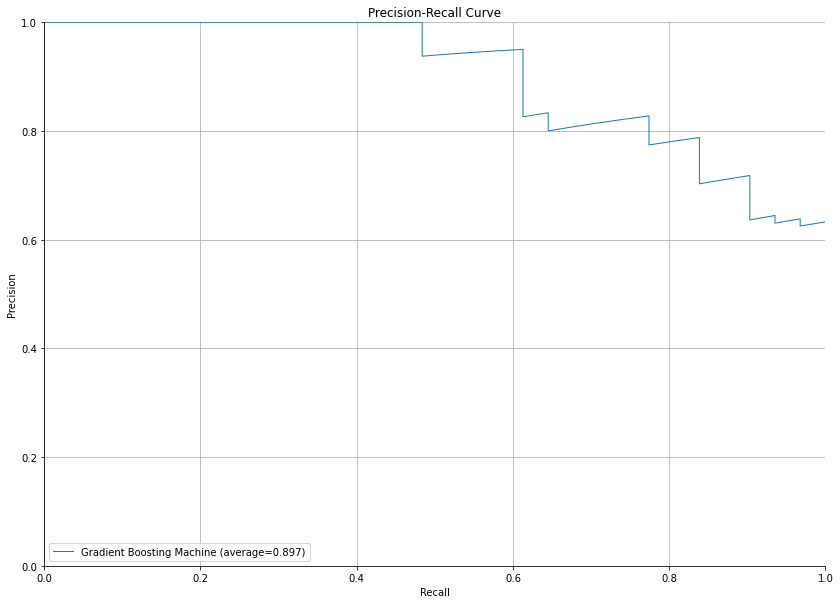

In [124]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,gbm4.predict_proba(X_test4),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [125]:
CM4=confusion_matrix(y_test4,y_pred_rfe4)
#sns.heatmap(CM, annot=True)

TN4 = CM4[0][0]
FN4 = CM4[1][0]
TP4 = CM4[1][1]
FP4 = CM4[0][1]
specificity4 = TN4/(TN4+FP4)
loss_log4 = log_loss(y_test4, y_pred_rfe4)
acc4= accuracy_score(y_test4, y_pred_rfe4)
roc4=roc_auc_score(y_test4, y_pred_rfe4)
prec4 = precision_score(y_test4, y_pred_rfe4)
rec4 = recall_score(y_test4, y_pred_rfe4)
f1_4 = f1_score(y_test4, y_pred_rfe4)

mathew4 = matthews_corrcoef(y_test4, y_pred_rfe4)
model_results4 =pd.DataFrame([['Random Forest',acc4, prec4,rec4,specificity4, f1_4,roc4, loss_log4,mathew4]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])


In [126]:
data4 = {        'MLP': y_pred_mlp4, 
                'KNN': y_pred_knn4, 
                'EXtra tree classifier': y_pred_et_100_4,
                'XGB': y_pred_xgb4, 
                'SVC': y_pred_svc4, 
                'SGD': y_pred_sgd4,
                'Adaboost': y_pred_ada4, 
                'CART': y_pred_dtc4, 
                'GBM': y_pred_gbm4 }

models4 = pd.DataFrame(data4) 
 
for column4 in models4:
    CM4=confusion_matrix(y_test4,models4[column4])
    
    TN4 = CM4[0][0]
    FN4 = CM4[1][0]
    TP4 = CM4[1][1]
    FP4 = CM4[0][1]
    specificity4 = TN4/(TN4+FP4)
    loss_log4 = log_loss(y_test4, models4[column4])
    acc4= accuracy_score(y_test4, models4[column4])
    roc4=roc_auc_score(y_test4, models4[column4])
    prec4 = precision_score(y_test4, models4[column4])
    rec4 = recall_score(y_test4, models4[column4])
    f14 = f1_score(y_test4, models4[column4])
    mathew4 = matthews_corrcoef(y_test4, models4[column4])
    
    results4 =pd.DataFrame([[column4,acc4, prec4,rec4,specificity4, f1_4,roc4, loss_log4,mathew4]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results4 = model_results4.append(results4, ignore_index = True)


model_results4

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.877778,0.812500,0.838710,0.898305,0.825397,0.868507,4.221459,0.731634
1,MLP,0.788889,0.700000,0.677419,0.847458,0.825397,0.762438,7.291599,0.529088
2,KNN,0.788889,0.833333,0.483871,0.949153,0.825397,0.716512,7.291546,0.514418
3,EXtra tree classifier,0.866667,0.827586,0.774194,0.915254,0.825397,0.844724,4.605215,0.701042
4,XGB,0.866667,0.787879,0.838710,0.881356,0.825397,0.860033,4.605232,0.710043
5,SVC,0.800000,0.724138,0.677419,0.864407,0.825397,0.770913,6.907826,0.550938
6,SGD,0.833333,0.833333,0.645161,0.932203,0.825397,0.788682,5.756498,0.620411
7,Adaboost,0.866667,0.806452,0.806452,0.898305,0.825397,0.852378,4.605223,0.704757
8,CART,0.800000,0.709677,0.709677,0.847458,0.825397,0.778568,6.907835,0.557135
9,GBM,0.844444,0.774194,0.774194,0.881356,0.825397,0.827775,5.372761,0.655549


# Findings:


AS we can see from above results, 'Random Forest' is best performer as it has highest test accuracy of 0.88, sensitivity of 0.84 and specificity of 0.90 and highest f1-score of 0.83 and lowest Log Loss of 4.22.

# ROC AUC Curve of Top Performing Models - Combined

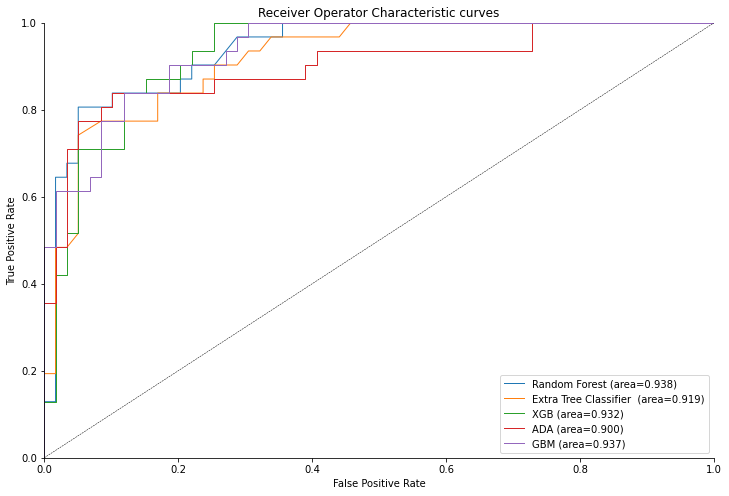

In [129]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test4,rf_ent4.predict_proba(X_test4),label='Random Forest',l='-')
roc_auc_plot(y_test4,et_100_4.predict_proba(X_test4),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test4,xgb4.predict_proba(X_test4),label='XGB',l='-')
roc_auc_plot(y_test4,ada4.predict_proba(X_test4),label='ADA',l='-')
roc_auc_plot(y_test4,gbm4.predict_proba(X_test4),label='GBM',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

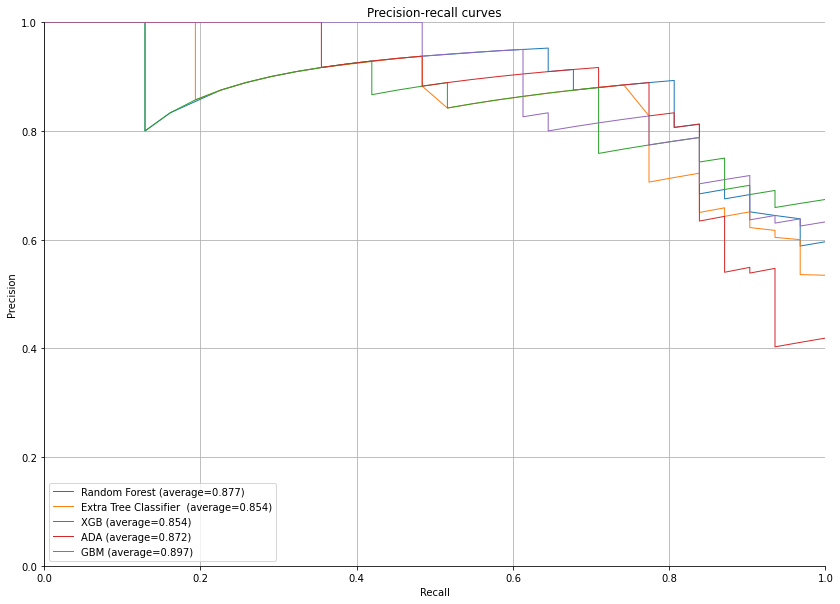

In [130]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test4,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test4, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test4,rf_ent4.predict_proba(X_test4),label='Random Forest',l='-')
precision_recall_plot(y_test4,et_100_4.predict_proba(X_test4),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test4,xgb4.predict_proba(X_test4),label='XGB',l='-')
precision_recall_plot(y_test4,ada4.predict_proba(X_test4),label='ADA',l='-')
precision_recall_plot(y_test4,gbm4.predict_proba(X_test4),label='GBM',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

<AxesSubplot:>

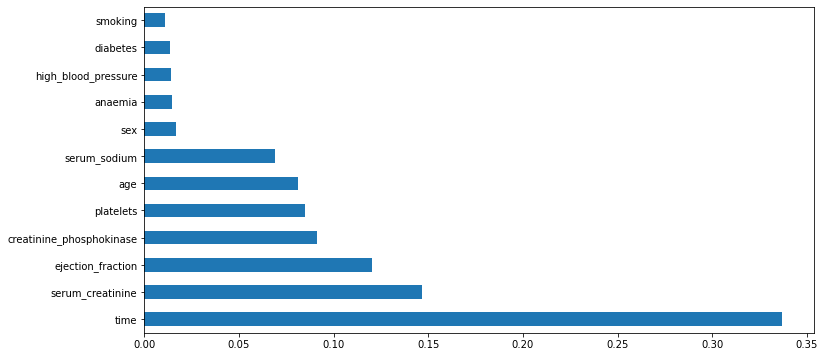

In [131]:
feat_importances = pd.Series(rf_ent4.feature_importances_, index=X_train4.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(12,6))

 # Conclusion:
    
    
We can see, ensemble machine learning algorithms resulted in higher performance than other machine learning model.
The top 5 most contribution features are:

i) time,

ii) serum_creatinine,

iii) ejection_fraction,

iv) creatinine_phosphoinase and 

v) platelets.